In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

## Open dataset

In [4]:
file = "UCI_Credit_Card.csv"
cc_df = pd.read_csv(file)

#### Validate successfully loaded dataset

In [9]:
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Dataset analysis

#### Dataset description

In [89]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Variables type information

In [90]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Empty values

In [91]:
cc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Separate numerical and categorical values

In [100]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3',
'PAY_4','PAY_5','PAY_6']
numerical_cols = cc_df.drop(['ID','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2',
'PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month'], axis=1)

#### Analize numerical values

In [101]:
print('Describing numerical columns')
print(cc_df[numerical_cols.columns].describe())

Describing numerical columns
            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.

In [429]:
'''
target = cc_df.LIMIT_BAL.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
'''

"\ntarget = cc_df.LIMIT_BAL.values\ncounter = Counter(target)\nfor k,v in counter.items():\n    per = v / len(target) * 100\n    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))\n"

In [103]:
target = cc_df.AGE.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=24, Count=1127, Percentage=3.757%
Class=26, Count=1256, Percentage=4.187%
Class=34, Count=1162, Percentage=3.873%
Class=37, Count=1041, Percentage=3.470%
Class=57, Count=122, Percentage=0.407%
Class=29, Count=1605, Percentage=5.350%
Class=23, Count=931, Percentage=3.103%
Class=28, Count=1409, Percentage=4.697%
Class=35, Count=1113, Percentage=3.710%
Class=51, Count=340, Percentage=1.133%
Class=41, Count=824, Percentage=2.747%
Class=30, Count=1395, Percentage=4.650%
Class=49, Count=452, Percentage=1.507%
Class=39, Count=954, Percentage=3.180%
Class=40, Count=870, Percentage=2.900%
Class=27, Count=1477, Percentage=4.923%
Class=47, Count=501, Percentage=1.670%
Class=33, Count=1146, Percentage=3.820%
Class=32, Count=1158, Percentage=3.860%
Class=54, Count=247, Percentage=0.823%
Class=58, Count=122, Percentage=0.407%
Class=22, Count=560, Percentage=1.867%
Class=25, Count=1186, Percentage=3.953%
Class=31, Count=1217, Percentage=4.057%
Class=46, Count=570, Percentage=1.900%
Class=42, Co

In [427]:
'''
target = cc_df.BILL_AMT1.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
'''

"\ntarget = cc_df.BILL_AMT1.values\ncounter = Counter(target)\nfor k,v in counter.items():\n    per = v / len(target) * 100\n    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))\n"

In [428]:
'''
target = cc_df.PAY_AMT1.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
'''

"\ntarget = cc_df.PAY_AMT1.values\ncounter = Counter(target)\nfor k,v in counter.items():\n    per = v / len(target) * 100\n    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))\n"

#### Analyze categorical variables

In [102]:
print('Describing categorical columns')
print(cc_df[categorical_cols].describe())

Describing categorical columns
                SEX     EDUCATION      MARRIAGE           AGE         PAY_0  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       1.603733      1.853133      1.551867     35.485500     -0.016700   
std        0.489129      0.790349      0.521970      9.217904      1.123802   
min        1.000000      0.000000      0.000000     21.000000     -2.000000   
25%        1.000000      1.000000      1.000000     28.000000     -1.000000   
50%        2.000000      2.000000      2.000000     34.000000      0.000000   
75%        2.000000      2.000000      2.000000     41.000000      0.000000   
max        2.000000      6.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100  
std        1.197186    

In [10]:
target = cc_df['SEX'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=18112, Percentage=60.373%
Class=1, Count=11888, Percentage=39.627%


In [11]:
target = cc_df['EDUCATION'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=14030, Percentage=46.767%
Class=1, Count=10585, Percentage=35.283%
Class=3, Count=4917, Percentage=16.390%
Class=5, Count=280, Percentage=0.933%
Class=4, Count=123, Percentage=0.410%
Class=6, Count=51, Percentage=0.170%
Class=0, Count=14, Percentage=0.047%


In [12]:
target = cc_df['MARRIAGE'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=13659, Percentage=45.530%
Class=2, Count=15964, Percentage=53.213%
Class=3, Count=323, Percentage=1.077%
Class=0, Count=54, Percentage=0.180%


In [13]:
target = cc_df['PAY_0'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=2667, Percentage=8.890%
Class=-1, Count=5686, Percentage=18.953%
Class=0, Count=14737, Percentage=49.123%
Class=-2, Count=2759, Percentage=9.197%
Class=1, Count=3688, Percentage=12.293%
Class=3, Count=322, Percentage=1.073%
Class=4, Count=76, Percentage=0.253%
Class=8, Count=19, Percentage=0.063%
Class=7, Count=9, Percentage=0.030%
Class=5, Count=26, Percentage=0.087%
Class=6, Count=11, Percentage=0.037%


In [107]:
target = cc_df['PAY_2'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=3927, Percentage=13.090%
Class=0, Count=15730, Percentage=52.433%
Class=-1, Count=6050, Percentage=20.167%
Class=-2, Count=3782, Percentage=12.607%
Class=3, Count=326, Percentage=1.087%
Class=5, Count=25, Percentage=0.083%
Class=7, Count=20, Percentage=0.067%
Class=4, Count=99, Percentage=0.330%
Class=1, Count=28, Percentage=0.093%
Class=6, Count=12, Percentage=0.040%
Class=8, Count=1, Percentage=0.003%


In [108]:
target = cc_df['PAY_3'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=-1, Count=5938, Percentage=19.793%
Class=0, Count=15764, Percentage=52.547%
Class=2, Count=3819, Percentage=12.730%
Class=-2, Count=4085, Percentage=13.617%
Class=3, Count=240, Percentage=0.800%
Class=4, Count=76, Percentage=0.253%
Class=6, Count=23, Percentage=0.077%
Class=7, Count=27, Percentage=0.090%
Class=1, Count=4, Percentage=0.013%
Class=5, Count=21, Percentage=0.070%
Class=8, Count=3, Percentage=0.010%


#### Output variable

In [14]:
target = cc_df['default.payment.next.month'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=6636, Percentage=22.120%
Class=0, Count=23364, Percentage=77.880%


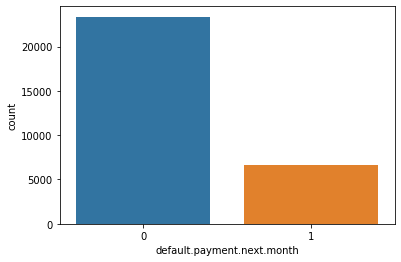

In [15]:
sns.countplot(x='default.payment.next.month', data=cc_df)
plt.show()

### Graphical analysis

#### Output variable

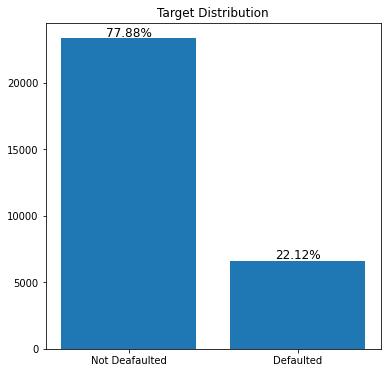

In [109]:
# Percentage of people who have Defaulted and not defaulted
target_count = cc_df.groupby('default.payment.next.month').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['default.payment.next.month'], target_count.counts)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

total = len(cc_df['default.payment.next.month'])
not_def = len(cc_df[cc_df['default.payment.next.month']==0])/total *100
yes_def = len(cc_df[cc_df['default.payment.next.month']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(cc_df[cc_df['default.payment.next.month']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(cc_df[cc_df['default.payment.next.month']==1])*1.02), horizontalalignment='center')

plt.show()

#### Analysis of categorical values

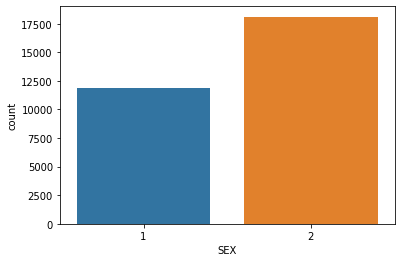

In [19]:
sns.countplot(x='SEX', data=cc_df)
plt.show()

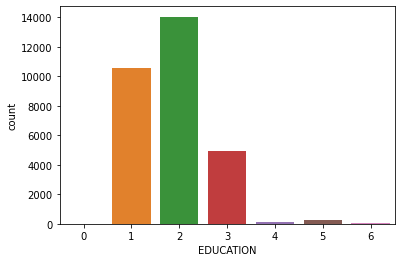

In [20]:
sns.countplot(x='EDUCATION', data=cc_df)
plt.show()

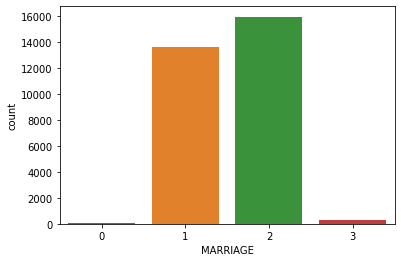

In [21]:
sns.countplot(x='MARRIAGE', data=cc_df)
plt.show()

<Figure size 432x432 with 0 Axes>

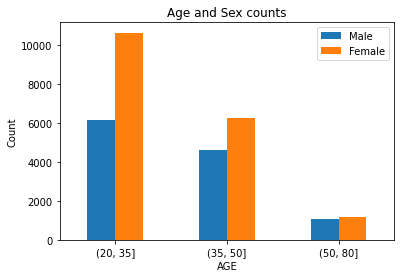

In [22]:
cc_df['AGE'] = pd.cut(cc_df.AGE, bins=[20,35,50,80])

target_count = cc_df.groupby(['AGE','SEX']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.title("Age and Sex counts")
plt.show()

<Figure size 432x432 with 0 Axes>

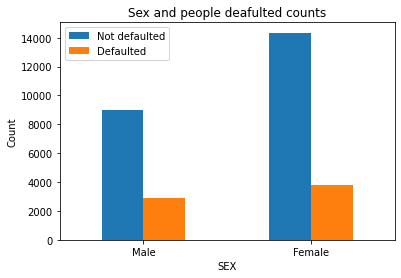

In [110]:
target_count = cc_df.groupby(['SEX','default.payment.next.month']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and people deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

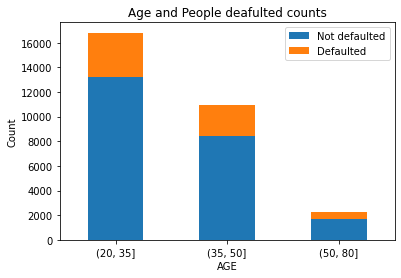

In [25]:
target_count = cc_df.groupby(['AGE','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age and People deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

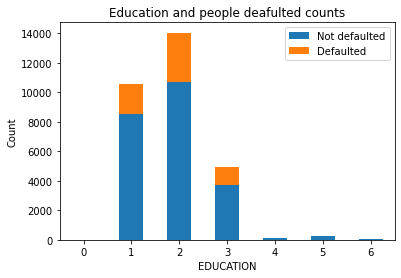

In [112]:
target_count = cc_df.groupby(['EDUCATION','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Education and people deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

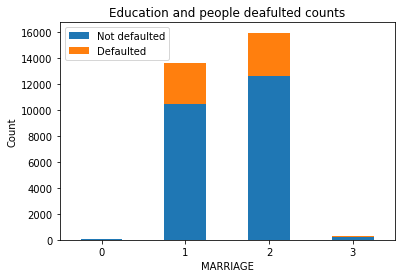

In [113]:
target_count = cc_df.groupby(['MARRIAGE','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Education and people deafulted counts")
plt.show()

#### Analysis of numerical variables

##### Box-plot 

In [114]:
'''
numerical_cols.plot(kind='box')
plt.figsize=(20,10)
plt.xticks(rotation=90)
plt.show()
'''

"\nnumerical_cols.plot(kind='box')\nplt.figsize=(20,10)\nplt.xticks(rotation=90)\nplt.show()\n"

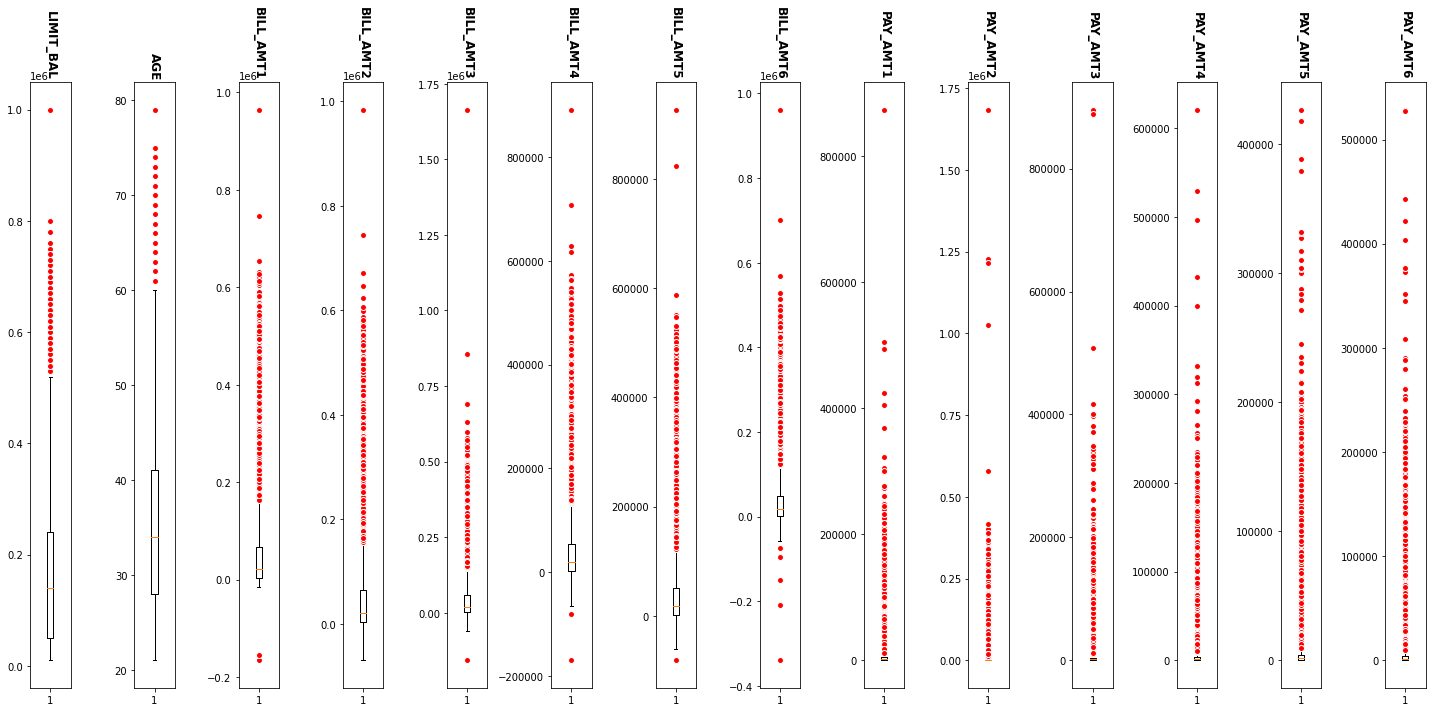

In [119]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(numerical_cols.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(numerical_cols.iloc[:,i], flierprops=red_circle)
    ax.set_title(numerical_cols.columns[i], rotation=270, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
plt.tight_layout()

##### Histogram

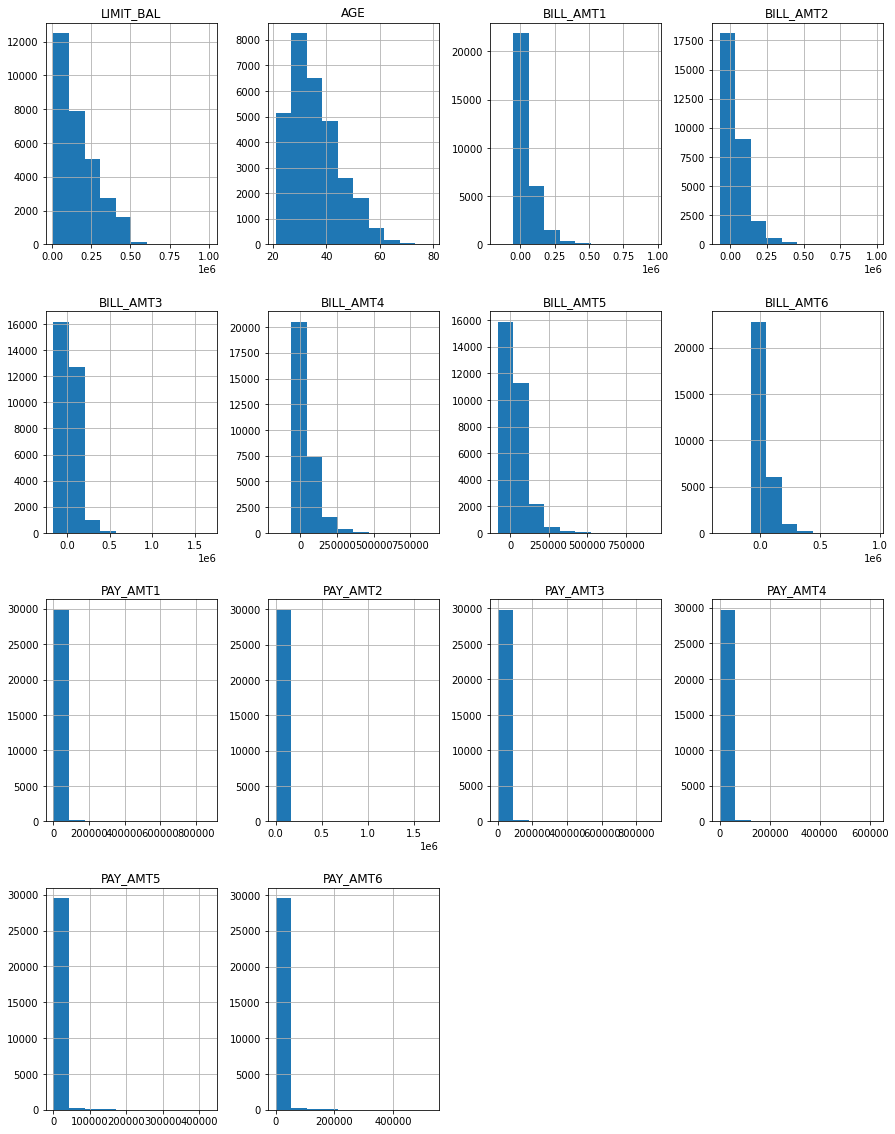

In [133]:
numerical_cols.hist(figsize = (15,20))
plt.show()

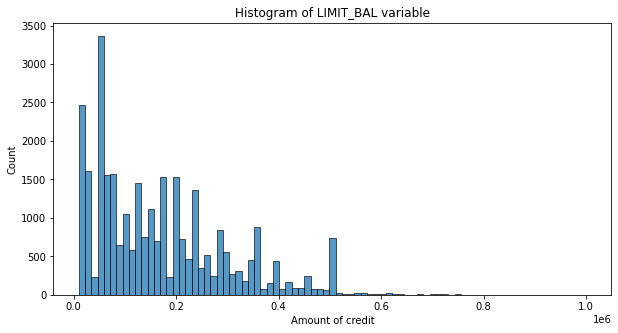

In [140]:
plt.subplots(figsize=(10,5))
plt.title('Histogram of LIMIT_BAL variable')
plt.xlabel('Amount of credit')
sns.histplot(cc_df.LIMIT_BAL)
plt.show()

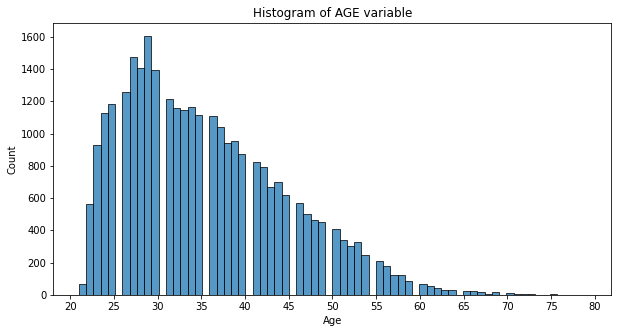

In [142]:
x = np.random.randint(low=0, high=80, size=100)
plt.subplots(figsize=(10,5))
plt.title('Histogram of AGE variable')
plt.xlabel('Age')
plt.xticks(np.arange(0, len(x)+1, 5))
sns.histplot(cc_df.AGE)
plt.show()

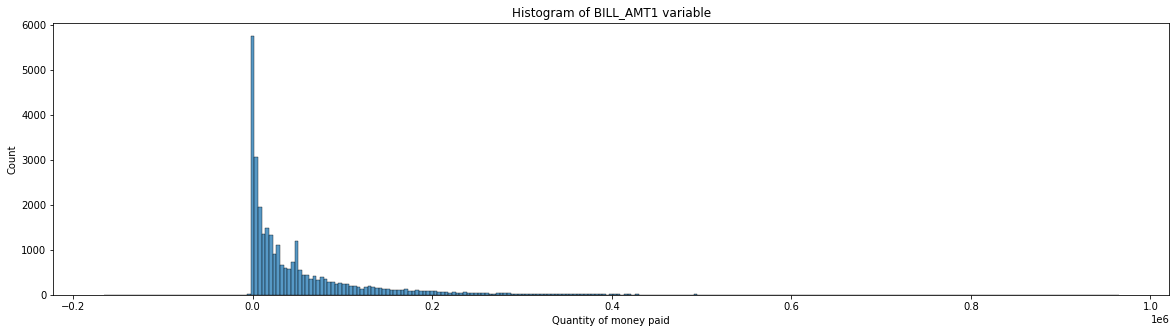

In [156]:
plt.subplots(figsize=(20,5))
plt.title('Histogram of BILL_AMT1 variable')
plt.xlabel('Quantity of money paid')
sns.histplot(cc_df.BILL_AMT1)
plt.show()

#### Correlation matrix

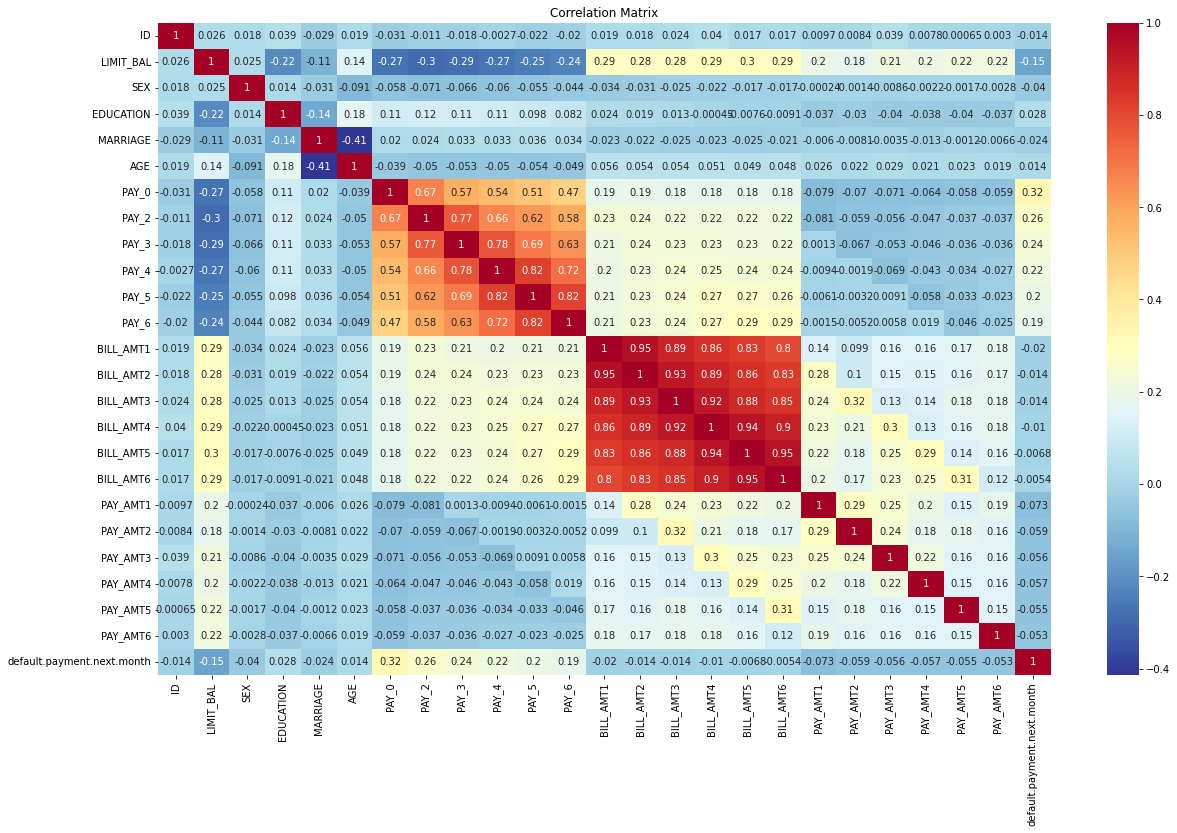

In [164]:
corr_mat = cc_df.corr()
plt.figure(figsize = [20,12])
sns.heatmap(corr_mat, annot = True, cmap = 'RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

#### Graphic analysis of predictor variables with respect to the output

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

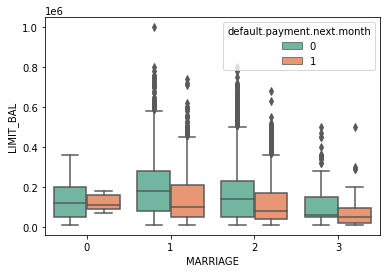

In [309]:
sns.boxplot(x= 'MARRIAGE', y= 'LIMIT_BAL',
            hue='default.payment.next.month',
            data= cc_df,
            palette = 'Set2')

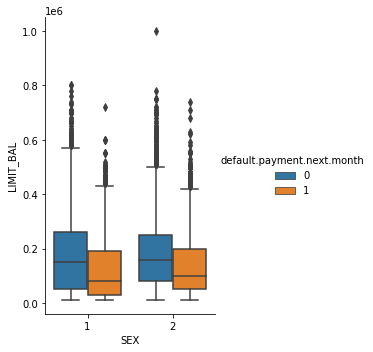

In [310]:
sns.catplot(x='SEX', y='LIMIT_BAL',
            hue='default.payment.next.month',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

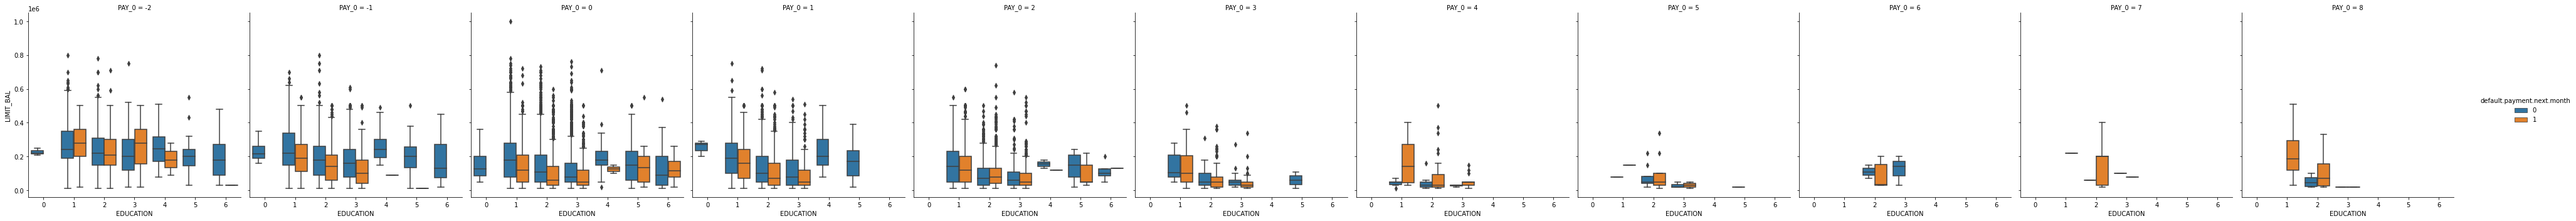

In [318]:
sns.catplot(x='EDUCATION', y='LIMIT_BAL',
            hue ='default.payment.next.month', col ='PAY_0',
            data=cc_df, kind="box")

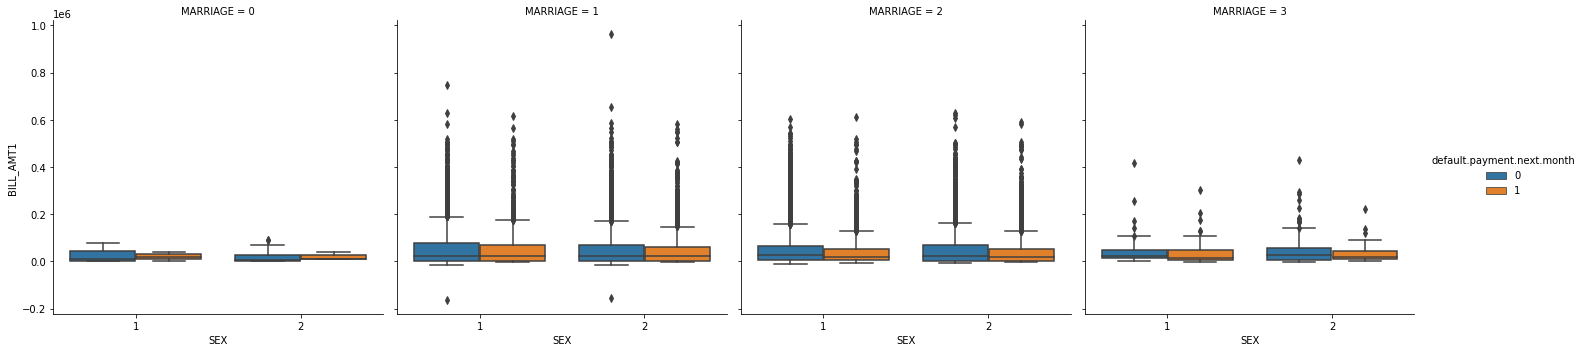

In [320]:
sns.catplot(x='SEX', y='BILL_AMT1',
            hue ='default.payment.next.month', col ='MARRIAGE',
            data=cc_df, kind="box")

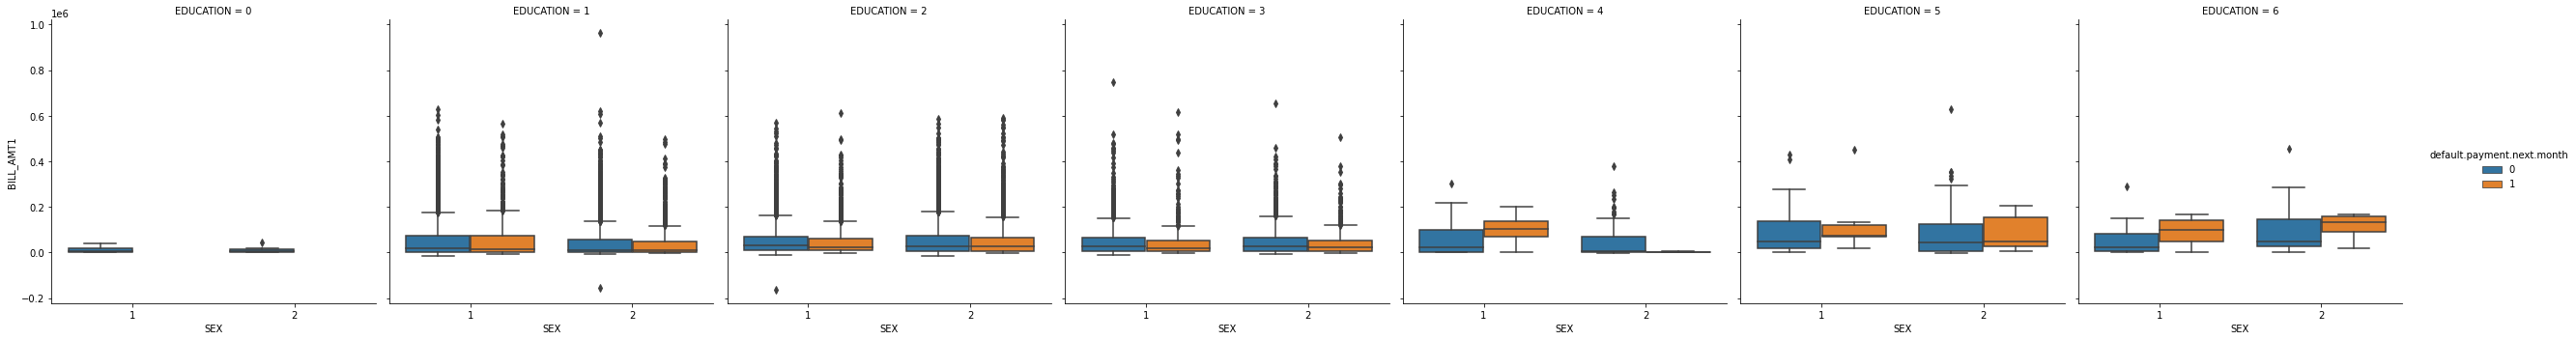

In [321]:
sns.catplot(x='SEX', y='BILL_AMT1',
            hue ='default.payment.next.month', col ='EDUCATION',
            data=cc_df, kind="box")

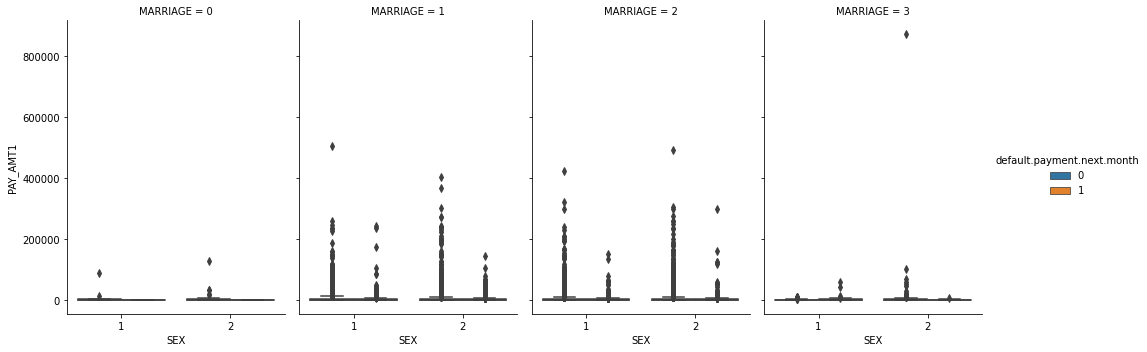

In [322]:
sns.catplot(x='SEX', y='PAY_AMT1',
            hue ='default.payment.next.month', col ='MARRIAGE',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

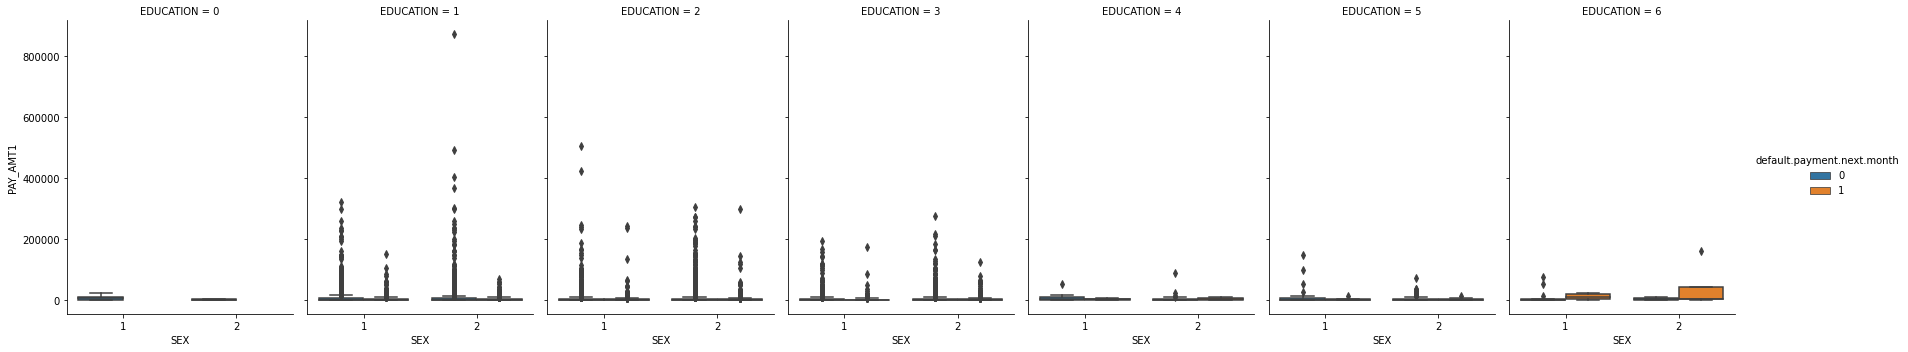

In [324]:
sns.catplot(x='SEX', y='PAY_AMT1',
            hue ='default.payment.next.month', col ='EDUCATION',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

## Data cleaning

#### Rename column PAY_0 to PAY_1
Follow the same order as BILL_AMT and PAY_AMT

In [5]:
cc_df = cc_df.rename(columns={'PAY_0': 'PAY_1'})

#### Rename column default.payment.next.month to default

In [6]:
cc_df = cc_df.rename(columns={'default.payment.next.month': 'default'})
print(f'Column names are :', list(cc_df.columns))

Column names are : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


#### Drop ID column

In [7]:
cc_df = cc_df.drop(axis=1, columns='ID')

#### EDUCATION variable

From Data Description, that in column EDUCATION, 0, 5 and 6 represents "unknown"

In [8]:
# Description of values
summary = cc_df.EDUCATION.value_counts()
print(summary)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


In [9]:
# Delete 0, 5 and 6
m = (cc_df.EDUCATION == 0)|(cc_df.EDUCATION == 6)|(cc_df.EDUCATION == 5)
cc_df = cc_df.drop(cc_df.EDUCATION[m].index.values, axis=0)
print(f'Unique values of Education columns are:',np.unique(cc_df.EDUCATION))

Unique values of Education columns are: [1 2 3 4]


#### MARRIAGE variable

From Data Description, in column MARRIAGE, rows with 0 value does not exists. I will proceed to delete them 

In [10]:
# Description of values
summary = cc_df.MARRIAGE.value_counts()
print(summary)

2    15806
1    13477
3      318
0       54
Name: MARRIAGE, dtype: int64


In [11]:
m = (cc_df.MARRIAGE == 0)
cc_df = cc_df.drop(cc_df.MARRIAGE[m].index.values, axis=0)
print(f'Unique values of Education columns are:',np.unique(cc_df.MARRIAGE))

Unique values of Education columns are: [1 2 3]


In total 399 rows; 345 (280 + 51 + 14) elements of EDUCATION  and 54 of MARRIAGE were deleted. This value represents 1.33% of the whole dataset.

## Data management

#### Rescaling variable PAY

In [12]:
cc_df[['PAY_' + str(n) for n in range(1, 7)]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


All of this attributes have a minimum value equal to -2, not included in the ranking. Maximum value is equal to 8. 
I will try changing the scale of the values.

In [13]:
cc_df[['PAY_' + str(n) for n in range(1, 7)]] += 1
cc_df[['PAY_' + str(n) for n in range(1, 7)]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.985068,0.868687,0.836560,0.781697,0.736022,0.712442
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


#### One-hot enconding
EDUCATION, SEX, and MARRIAGE variables include categories. 
Variables PAY_1 to PAY_6 have many categories.

In [14]:
cc_df.EDUCATION = cc_df.EDUCATION.astype('category')
cc_df.SEX = cc_df.SEX.astype('category')
cc_df.MARRIAGE = cc_df.MARRIAGE.astype('category')
cc_df.PAY_1 = cc_df.PAY_1.astype('category')
cc_df.PAY_2 = cc_df.PAY_2.astype('category')
cc_df.PAY_3 = cc_df.PAY_3.astype('category')
cc_df.PAY_4 = cc_df.PAY_4.astype('category')
cc_df.PAY_5 = cc_df.PAY_5.astype('category')
cc_df.PAY_6 = cc_df.PAY_6.astype('category')

In [15]:
cc_df=pd.concat([pd.get_dummies(cc_df.EDUCATION, prefix='EDUCATION'),
                  pd.get_dummies(cc_df.SEX, prefix='SEX'),
                  pd.get_dummies(cc_df.MARRIAGE, prefix='MARRIAGE'),
                  pd.get_dummies(cc_df.PAY_1, prefix='PAY_1'),
                  pd.get_dummies(cc_df.PAY_2, prefix='PAY_2'),
                  pd.get_dummies(cc_df.PAY_3, prefix='PAY_3'),
                  pd.get_dummies(cc_df.PAY_4, prefix='PAY_4'),
                  pd.get_dummies(cc_df.PAY_5, prefix='PAY_5'),
                  pd.get_dummies(cc_df.PAY_6, prefix='PAY_6'),
                  cc_df],axis=1)

In [16]:
cc_df.drop(['EDUCATION'],axis=1, inplace=True)
cc_df.drop(['SEX'],axis=1, inplace=True)
cc_df.drop(['MARRIAGE'],axis=1, inplace=True)
print(f'Column names are :', list(cc_df.columns))

Column names are : ['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'SEX_1', 'SEX_2', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_1_9', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_2_9', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_3_9', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_4_9', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_1', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_5_9', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_1', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'PAY_6_9', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'

## Transformation of variables

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [359]:
# Call MinMaxScaler instance
trans = MinMaxScaler()

In [360]:
# Create a copy of preprocessed data
mms_cp = cc_df
mms_cp.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,0,1,1,0,0,0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0,1,0,0,0,1,0,1,0,0,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0,1,0,0,0,1,0,1,0,0,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0,1,0,0,0,1,1,0,0,0,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0,1,0,0,1,0,1,0,0,0,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


##### Transform numerical variables

In [361]:
mms_cp.LIMIT_BAL = trans.fit_transform(mms_cp.LIMIT_BAL.values.reshape(-1, 1))
mms_cp.AGE = trans.fit_transform(mms_cp.AGE.values.reshape(-1, 1))

In [362]:
for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['BILL_AMT' + str(i)] = scaler.fit_transform(mms_cp['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['PAY_AMT' + str(i)] = scaler.fit_transform(mms_cp['PAY_AMT' + str(i)].values.reshape(-1, 1))

"\nfor i in range(1,7):\n    scaler = MinMaxScaler()\n    mms_cp['PAY_' + str(i)] = scaler.fit_transform(mms_cp['PAY_' + str(i)].values.reshape(-1, 1))\n"

In [378]:
# Call MinMaxScaler instance
trans = MinMaxScaler()

In [379]:
# Create a copy of preprocessed data
mms_cp = cp_df
mms_cp.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,1,0,0,1,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,0,1,0,0,0,1,0,0,0,1,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,0,1,0,0,1,0,0,0,0,1,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,0,1,0,0,1,0,0,0,1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### Transform numerical variables

In [381]:
mms_cp.LIMIT_BAL = trans.fit_transform(mms_cp.LIMIT_BAL.values.reshape(-1, 1))
#mms_cp.AGE = trans.fit_transform(mms_cp.AGE.values.reshape(-1, 1))

In [382]:
for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['BILL_AMT' + str(i)] = scaler.fit_transform(mms_cp['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['PAY_AMT' + str(i)] = scaler.fit_transform(mms_cp['PAY_AMT' + str(i)].values.reshape(-1, 1))

#### Standard Scaler

In [18]:
scaler = StandardScaler()

In [19]:
# Create a copy of preprocessed data
std_cp = cc_df
std_cp.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,1,0,1,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,0,1,0,0,0,1,0,1,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,0,1,0,0,0,1,1,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,0,1,0,0,1,0,1,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### Transform numerical values

In [20]:
std_cp.LIMIT_BAL = scaler.fit_transform(std_cp.LIMIT_BAL.values.reshape(-1, 1))
std_cp.AGE = scaler.fit_transform(std_cp.AGE.values.reshape(-1, 1))

In [21]:
for i in range(1,7):
    sscaler = StandardScaler()
    std_cp['BILL_AMT' + str(i)] = scaler.fit_transform(std_cp['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = StandardScaler()
    std_cp['PAY_AMT' + str(i)] = scaler.fit_transform(std_cp['PAY_AMT' + str(i)].values.reshape(-1, 1))

'''
for i in range(1,7):
    #scaler = StandardScaler()
    std_cp['PAY_' + str(i)] = scaler.fit_transform(std_cp['PAY_' + str(i)].values.reshape(-1, 1))
'''

"\nfor i in range(1,7):\n    #scaler = StandardScaler()\n    std_cp['PAY_' + str(i)] = scaler.fit_transform(std_cp['PAY_' + str(i)].values.reshape(-1, 1))\n"

## Outliers detection
Four automatic outlier detection algorithms are going to be used

In [22]:
# Isolation forest
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest()
is_outliers = isolation_forest.fit_predict(std_cp)

In [23]:
from sklearn.svm import OneClassSVM
nu=0.1
one_class_svm = OneClassSVM(nu = nu, kernel='poly')
ocsvm_outliers = one_class_svm.fit_predict(std_cp)

In [24]:
from sklearn.svm import OneClassSVM
nu=0.2
one_class_svm = OneClassSVM(nu=nu)
svdd_outliers = one_class_svm.fit_predict(std_cp)

In [25]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=200)
lof_outliers = lof.fit_predict(std_cp)

In [26]:
num_is_outliers = len(np.where(is_outliers == -1)[0])
num_oc_outliers = len(np.where(ocsvm_outliers == -1)[0])
num_svdd_outliers = len(np.where(svdd_outliers == -1)[0])
num_lof_outliers = len(np.where(lof_outliers == -1)[0])

In [27]:
print('Outliers with Isolation Forest:', num_is_outliers)
print('Outliers with One Class SVM:', num_oc_outliers)
print('Outliers with LOF:', num_lof_outliers)
print('Outliers with SVMDD:',num_svdd_outliers)

Outliers with Isolation Forest: 3394
Outliers with One Class SVM: 3003
Outliers with LOF: 3361
Outliers with SVMDD: 5921


In [28]:
#mask = (is_outliers == -1)&(ocsvm_outliers == -1)&(lof_outliers == -1)
outliers = (is_outliers == -1)&(ocsvm_outliers == -1)&(lof_outliers == -1)&(svdd_outliers == -1)
common_outlier = np.sum(outliers)
print('The previous algorithms indentify:', common_outlier,  'outliers in common.')

The previous algorithms indentify: 65 outliers in common.


In [29]:
print(std_cp.shape)
std_cp.drop(std_cp[outliers].index, axis=0, inplace=True)
print(std_cp.shape)

(29601, 94)
(29536, 94)


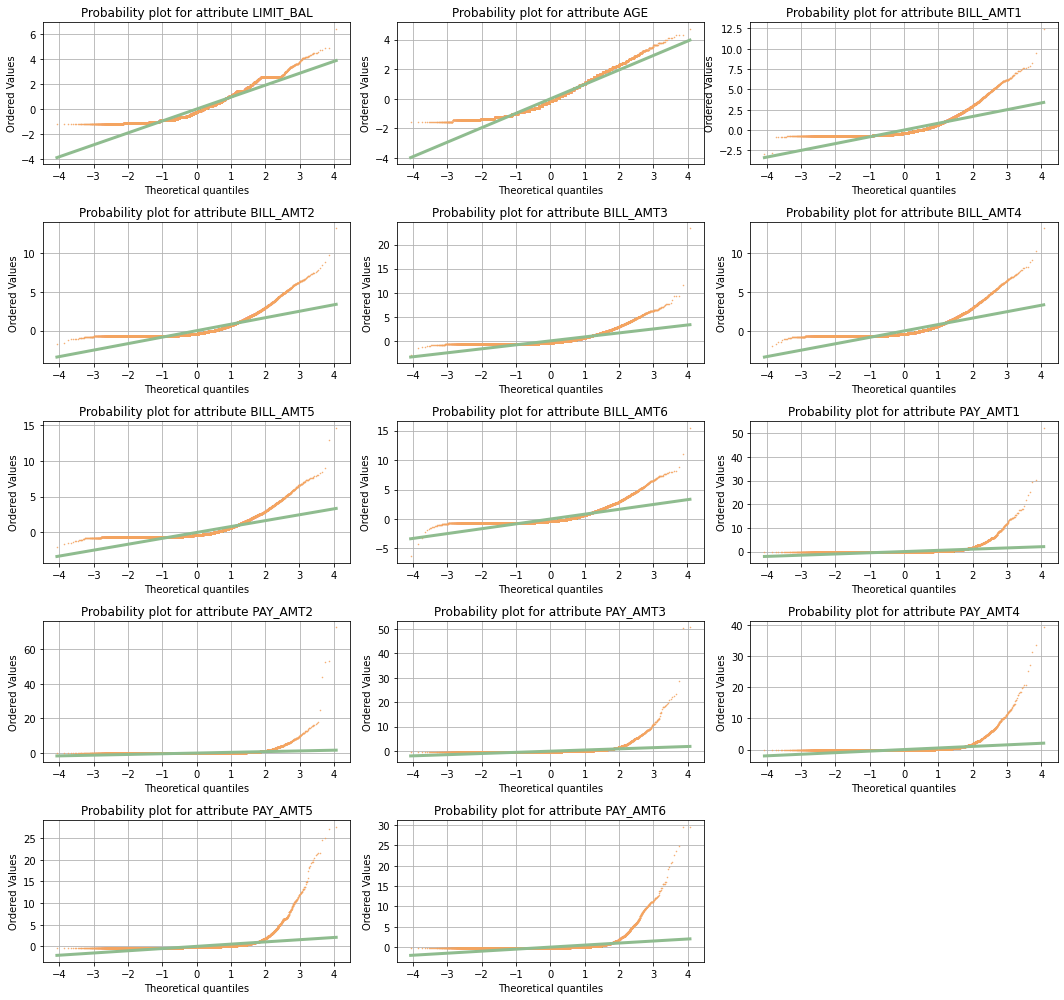

In [44]:
from scipy import stats

figs, axs= plt.subplots(5, 3, figsize=(15, 14))

i, j = 0, 0
d1 = ['BILL_AMT' + str(i) for i in range(1, 7)]
d2 = ['PAY_AMT' + str(i) for i in range(1, 7)]
d =  ['LIMIT_BAL', 'AGE'] + d1 + d2
for attribute in d:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(
        std_cp[attribute], 
        dist="norm", 
        sparams = (std_cp[attribute].mean(), std_cp[attribute].std()),
        plot=axs[i, j]
    )
    
    axs[i, j].get_lines()[0].set_marker('.')
    axs[i, j].get_lines()[0].set_color('sandybrown')
    axs[i, j].get_lines()[0].set_markersize(1.0)
    axs[i, j].set_title('Probability plot for attribute ' + attribute)
    axs[i, j].grid()
    axs[i, j].get_lines()[1].set_linewidth(3.0)
    axs[i, j].get_lines()[1].set_color('darkseagreen')
    j = j+1
    
figs.tight_layout()
axs[4, 2].set_visible(False)
plt.show()

## Data partition

#### Test and Train partition

In [30]:
X0 = std_cp.drop(['default'], axis=1)
Y0 = std_cp.default
X0.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,0,1,1,0,0,0,...,-0.667135,-0.671740,-0.662877,-0.652876,-0.340993,-0.225468,-0.295690,-0.307347,-0.314553,-0.293444
1,0,1,0,0,0,1,0,1,0,0,...,-0.638302,-0.620771,-0.605957,-0.598087,-0.340993,-0.211998,-0.238809,-0.243696,-0.314553,-0.180174
2,0,1,0,0,0,1,0,1,0,0,...,-0.480945,-0.448499,-0.416610,-0.391631,-0.249370,-0.190343,-0.238809,-0.243696,-0.248953,-0.010269
3,0,1,0,0,0,1,1,0,0,0,...,0.035991,-0.230680,-0.185780,-0.156445,-0.220278,-0.167864,-0.227433,-0.237331,-0.244427,-0.236809
4,0,1,0,0,1,0,1,0,0,0,...,-0.158677,-0.345548,-0.347449,-0.331449,-0.220278,1.333383,0.273118,0.265508,-0.269355,-0.254989


In [31]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.20, random_state=10)
print(X0_train.shape, Y0_train.shape)
print(X0_test.shape, Y0_test.shape)

(23628, 93) (23628,)
(5908, 93) (5908,)


## Modeling stage

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import RocCurveDisplay
from numpy import mean
from numpy import std

### Cross validation 
Statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model.

#### k-Nearest Neighbor

In [474]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn_scores = cross_val_score(knn, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(knn_scores), std(knn_scores)))

Accuracy: 0.773 (0.005)


In [475]:
knn_recall = cross_val_score(knn, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(knn_recall), std(knn_recall)))

Recall: 0.373 (0.017)


In [476]:
knn_f1 = cross_val_score(knn, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(knn_f1), std(knn_f1)))
knn_auc = cross_val_score(knn, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('AUC: %.3f (%.3f)' % (mean(knn_auc), std(knn_auc)))

f1-score: 0.422 (0.015)
AUC: 0.678 (0.012)


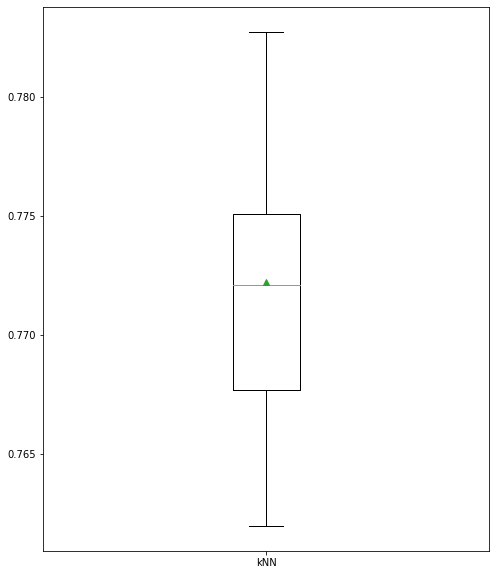

In [538]:
plt.boxplot(knn_scores, labels=['kNN'], showmeans=True)
plt.show()

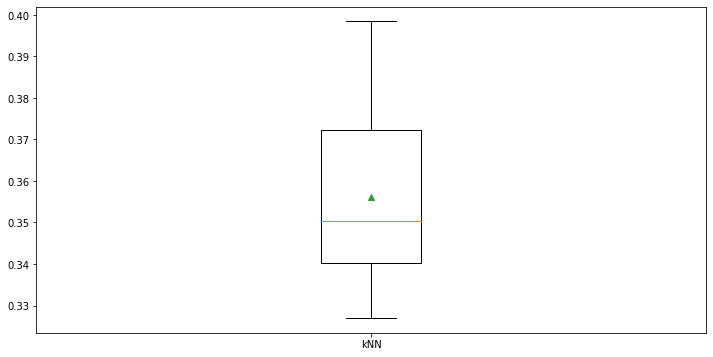

In [397]:
plt.boxplot(knn_recall, labels=['kNN'], showmeans=True)
plt.show()

###### Prediction

In [477]:
knn.fit(X0_train, Y0_train)
knn_pred = knn.predict(X0_test)

###### Confusion Matrix

In [478]:
print(confusion_matrix(Y0_test, knn_pred))

[[4094  482]
 [ 828  514]]


###### Classification report

In [586]:
print(classification_report(Y0_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4576
           1       0.52      0.38      0.44      1342

    accuracy                           0.78      5918
   macro avg       0.67      0.64      0.65      5918
weighted avg       0.76      0.78      0.77      5918



###### ROC curve

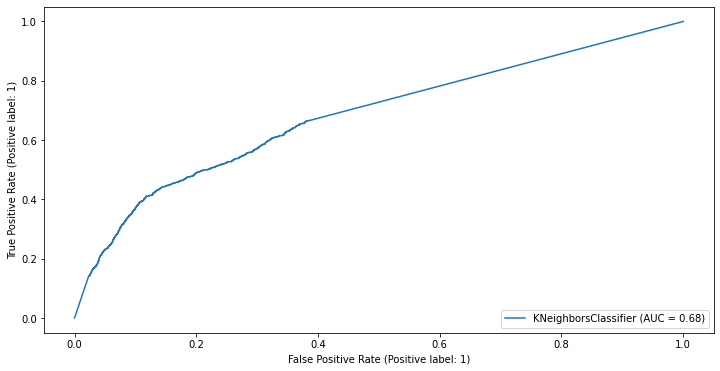

In [479]:
knn_displ = RocCurveDisplay.from_estimator(knn, X0_test, Y0_test)

###### Feature importance

In [538]:
from sklearn.inspection import permutation_importance
knn_features = permutation_importance(knn, X0_test, Y0_test, scoring='accuracy')
knn_importance = knn_features.importances_mean

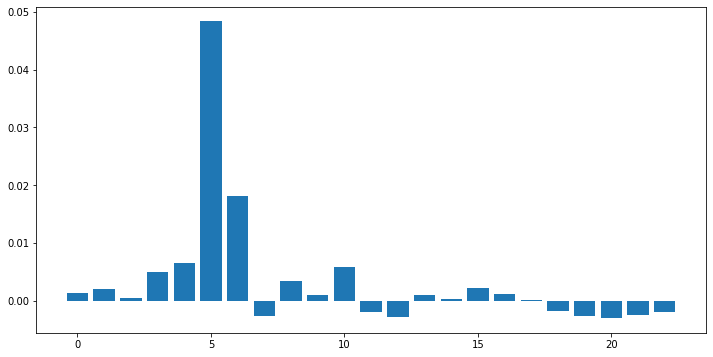

In [539]:
# plot feature importance
plt.bar([x for x in range(len(knn_importance))], knn_importance)
plt.show()

###### Mean Squared Error

In [480]:
mean_squared_error(Y0_test, knn_pred)

0.22135856708347415

#### Logistic Regression (LR)

In [481]:
lr = LogisticRegression(solver='liblinear', max_iter=90)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
lr_scores = cross_val_score(lr, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(lr_scores), std(lr_scores)))

Accuracy: 0.811 (0.004)


In [482]:
lr_recall = cross_val_score(lr, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(lr_recall), std(lr_recall)))

Recall: 0.242 (0.017)


In [483]:
lr_f1 = cross_val_score(lr, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(lr_f1), std(lr_f1)))
lr_auc = cross_val_score(lr, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('AUC: %.3f (%.3f)' % (mean(lr_auc), std(lr_auc)))

f1-score: 0.362 (0.021)
AUC: 0.723 (0.010)


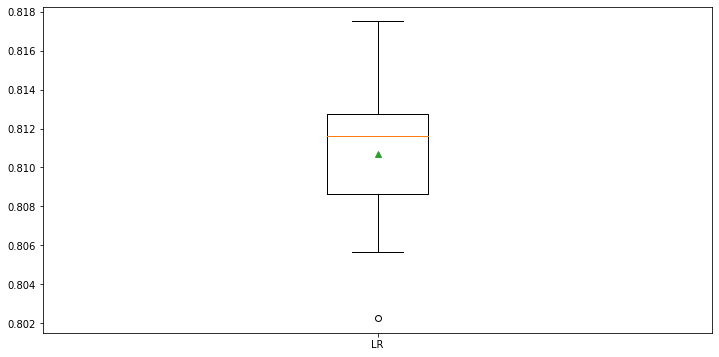

In [484]:
plt.boxplot(lr_scores, labels=['LR'], showmeans=True)
plt.show()

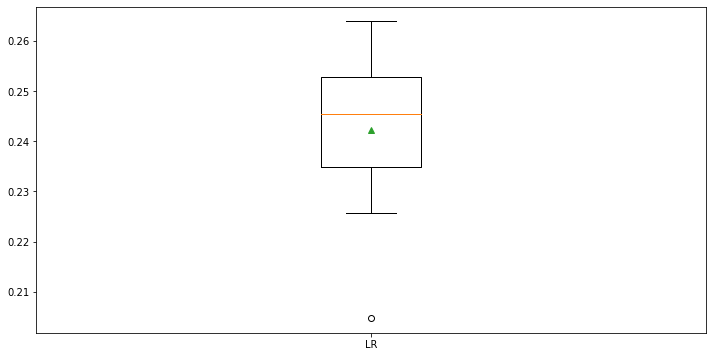

In [485]:
plt.boxplot(lr_recall, labels=['LR'], showmeans=True)
plt.show()

###### Prediction

In [486]:
lr.fit(X0_train, Y0_train)
lr_pred = lr.predict(X0_test)

###### Confusion matrix

In [487]:
print(confusion_matrix(Y0_test, lr_pred))

[[4446  130]
 [1032  310]]


###### Classification report

In [587]:
print(classification_report(Y0_test, lr_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4576
           1       0.70      0.23      0.35      1342

    accuracy                           0.80      5918
   macro avg       0.76      0.60      0.62      5918
weighted avg       0.79      0.80      0.76      5918



###### ROC curve

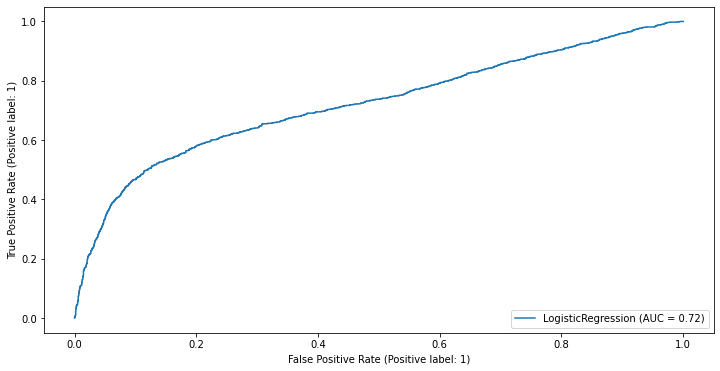

In [488]:
lr_displ = RocCurveDisplay.from_estimator(lr, X0_test, Y0_test)
plt.show()

###### Feature importance

In [540]:
lr_importance = lr.coef_[0]

In [563]:
for i,v in enumerate(lr_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.23734
Feature: 1, Score: 0.28798
Feature: 2, Score: 0.25612
Feature: 3, Score: -1.15678
Feature: 4, Score: -0.10532
Feature: 5, Score: -0.27003
Feature: 6, Score: -0.11212
Feature: 7, Score: -0.24463
Feature: 8, Score: -0.01860
Feature: 9, Score: -0.38816
Feature: 10, Score: -0.06655
Feature: 11, Score: -1.01636
Feature: 12, Score: -0.11122
Feature: 13, Score: 0.95485
Feature: 14, Score: 0.67880
Feature: 15, Score: 0.24514
Feature: 16, Score: 0.19247
Feature: 17, Score: -0.54065
Feature: 18, Score: 0.23930
Feature: 19, Score: -0.56297
Feature: 20, Score: -0.05623
Feature: 21, Score: -0.16032
Feature: 22, Score: 0.09252
Feature: 23, Score: -0.52739
Feature: 24, Score: 0.14326
Feature: 25, Score: 0.21995
Feature: 26, Score: -0.62201
Feature: 27, Score: 0.41519
Feature: 28, Score: 0.47434
Feature: 29, Score: -0.04779
Feature: 30, Score: -0.30688
Feature: 31, Score: -0.27688
Feature: 32, Score: -0.29450
Feature: 33, Score: -0.17436
Feature: 34, Score: 0.15916
Feature: 

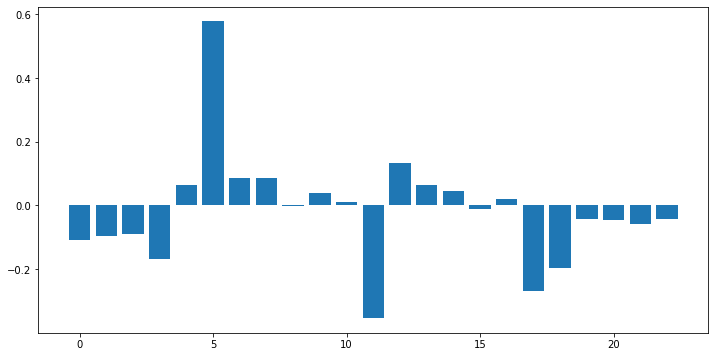

In [541]:
plt.bar([x for x in range(len(lr_importance))], lr_importance)
plt.show()

###### Mean Squared Error

In [489]:
mean_squared_error(Y0_test, lr_pred)

0.19635011828320378

#### Support Vector Machine (SVM)

In [490]:
#model = SVC(class_weight='balanced')
svc = SVC()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
svc_scores = cross_val_score(svc, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(svc_scores), std(svc_scores)))

Accuracy: 0.819 (0.004)


In [491]:
svc_recall = cross_val_score(svc, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(svc_recall), std(svc_recall)))

Recall: 0.342 (0.013)


In [492]:
svc_f1 = cross_val_score(lr, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(svc_f1), std(svc_f1)))
svc_auc = cross_val_score(lr, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('AUC: %.3f (%.3f)' % (mean(svc_auc), std(svc_auc)))

f1-score: 0.362 (0.021)
AUC: 0.723 (0.010)


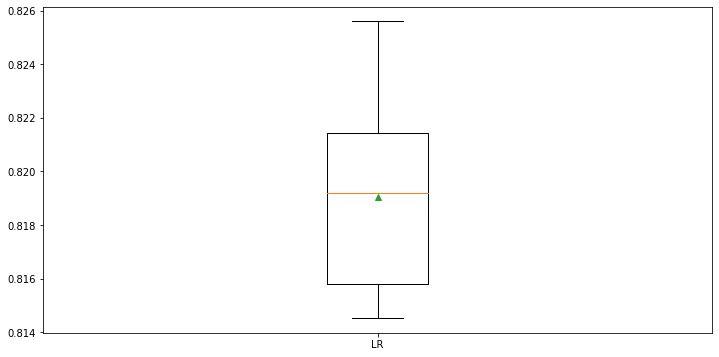

In [493]:
plt.boxplot(svc_scores, labels=['LR'], showmeans=True)
plt.show()

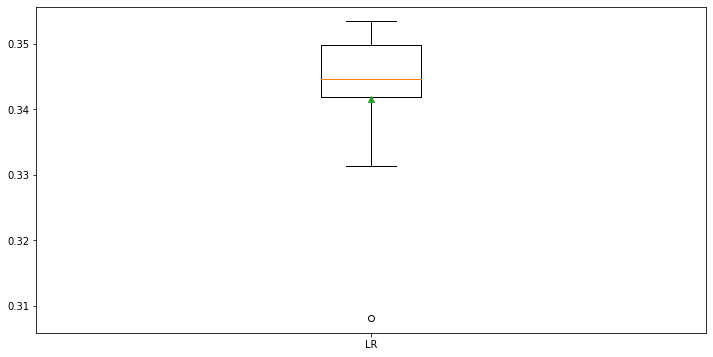

In [494]:
plt.boxplot(svc_recall, labels=['LR'], showmeans=True)
plt.show()

###### Prediction

In [495]:
svc.fit(X0_train, Y0_train)
svc_pred = svc.predict(X0_test)

###### Confusion matrix

In [496]:
print(confusion_matrix(Y0_test, svc_pred))

[[4364  212]
 [ 881  461]]


###### Classification report

In [588]:
print(classification_report(Y0_test, svc_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4576
           1       0.68      0.34      0.46      1342

    accuracy                           0.82      5918
   macro avg       0.76      0.65      0.67      5918
weighted avg       0.80      0.82      0.79      5918



###### ROC curve

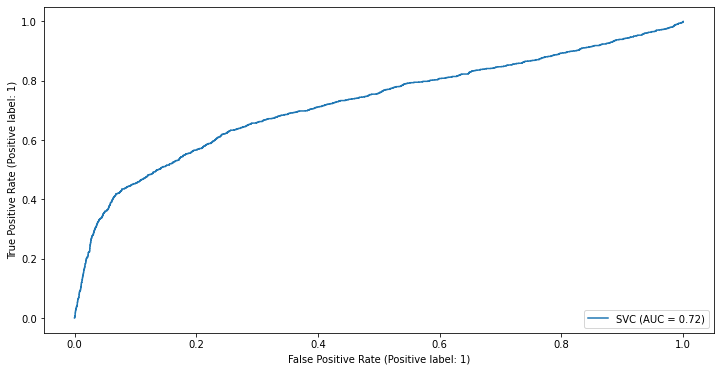

In [497]:
svc_displ = RocCurveDisplay.from_estimator(svc, X0_test, Y0_test)
plt.show()

###### Mean Squared Error

In [498]:
mean_squared_error(Y0_test, svc_pred)

0.18469077391010477

#### Multi-layer Perceptron Classifier

In [499]:
mlp = MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
mlp_scores = cross_val_score(mlp, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(mlp_scores), std(mlp_scores)))

Accuracy: 0.818 (0.005)


In [500]:
mlp_recall = cross_val_score(mlp, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(mlp_recall), std(mlp_recall)))

Recall: 0.340 (0.021)


In [501]:
mlp_f1 = cross_val_score(mlp, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(mlp_f1), std(mlp_f1)))
mlp_auc = cross_val_score(mlp, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('AUC: %.3f (%.3f)' % (mean(mlp_auc), std(mlp_auc)))

f1-score: 0.454 (0.017)
AUC: 0.765 (0.012)


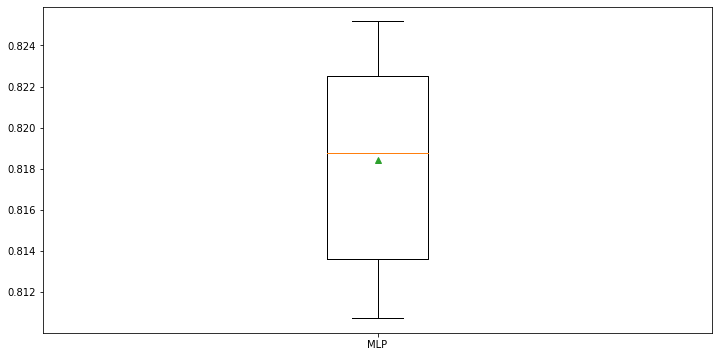

In [502]:
plt.boxplot(mlp_scores, labels=['MLP'], showmeans=True)
plt.show()

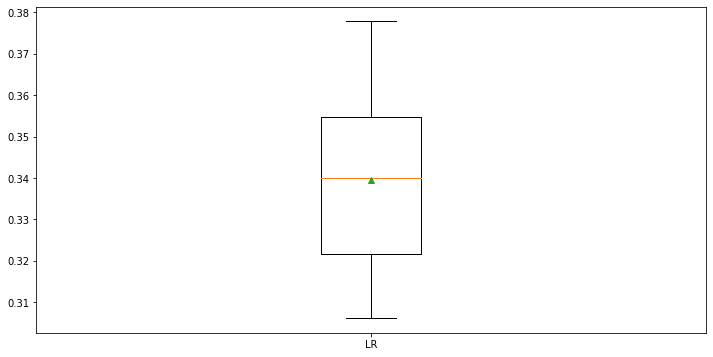

In [503]:
plt.boxplot(mlp_recall, labels=['LR'], showmeans=True)
plt.show()

###### Prediction

In [504]:
mlp.fit(X0_train, Y0_train)
mlp_pred = mlp.predict(X0_test)

###### Confusion matrix

In [505]:
print(confusion_matrix(Y0_test, mlp_pred))

[[4360  216]
 [ 892  450]]


###### Classification report

In [506]:
print(classification_report(Y0_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4576
           1       0.68      0.34      0.45      1342

    accuracy                           0.81      5918
   macro avg       0.75      0.64      0.67      5918
weighted avg       0.80      0.81      0.79      5918



###### ROC curve

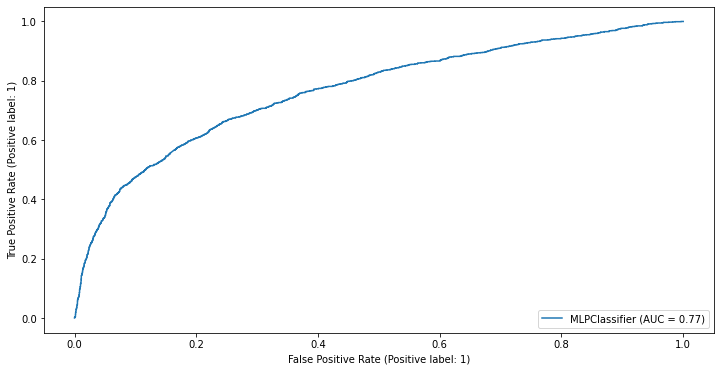

In [507]:
mlp_disp = RocCurveDisplay.from_estimator(mlp, X0_test, Y0_test)

###### Mean squared error

In [508]:
mean_squared_error(Y0_test, mlp_pred)

0.18722541399121326

#### Decision tree classifier

In [510]:
dt = DecisionTreeClassifier()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
dt_scores = cross_val_score(dt, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(dt_scores), std(dt_scores)))

Accuracy: 0.727 (0.007)


In [511]:
dt_recall = cross_val_score(dt, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(dt_recall), std(dt_recall)))

Recall: 0.435 (0.022)


In [512]:
dt_f1 = cross_val_score(dt, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(dt_f1), std(dt_f1)))
dt_auc = cross_val_score(dt, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('AUC: %.3f (%.3f)' % (mean(dt_auc), std(dt_auc)))

f1-score: 0.413 (0.020)
AUC: 0.619 (0.010)


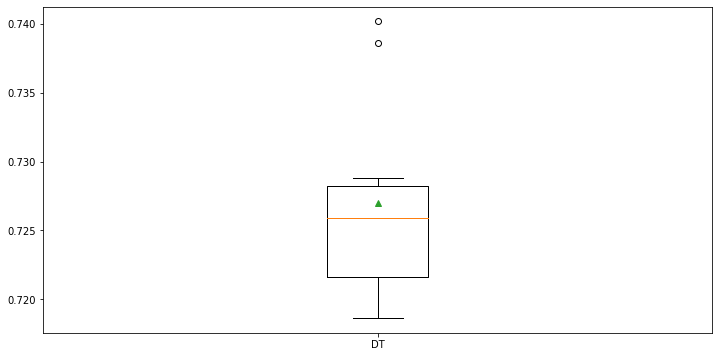

In [513]:
plt.boxplot(dt_scores, labels=['DT'], showmeans=True)
plt.show()

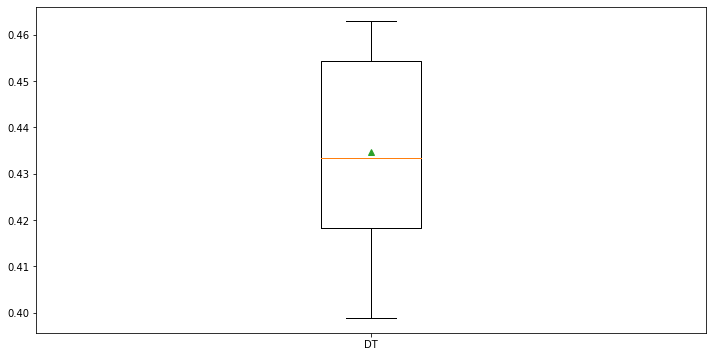

In [514]:
plt.boxplot(dt_recall, labels=['DT'], showmeans=True)
plt.show()

###### Prediction

In [515]:
dt.fit(X0_train, Y0_train)
dt_pred = dt.predict(X0_test)

###### Confusion matrix

In [516]:
print(confusion_matrix(Y0_test, dt_pred))

[[3713  863]
 [ 791  551]]


###### Classification report

In [517]:
print(classification_report(Y0_test, dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4576
           1       0.39      0.41      0.40      1342

    accuracy                           0.72      5918
   macro avg       0.61      0.61      0.61      5918
weighted avg       0.73      0.72      0.72      5918



###### ROC curve

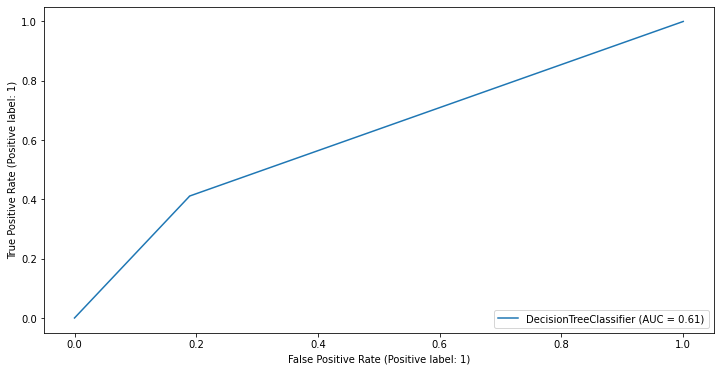

In [518]:
dt_displ = RocCurveDisplay.from_estimator(dt, X0_test, Y0_test)

###### Feature importance

In [582]:
dt_importance = dt.feature_importances_
for i,v in enumerate(dt_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05874
Feature: 1, Score: 0.01392
Feature: 2, Score: 0.02026
Feature: 3, Score: 0.01214
Feature: 4, Score: 0.07524
Feature: 5, Score: 0.16183
Feature: 6, Score: 0.03816
Feature: 7, Score: 0.00934
Feature: 8, Score: 0.00821
Feature: 9, Score: 0.01191
Feature: 10, Score: 0.00929
Feature: 11, Score: 0.06186
Feature: 12, Score: 0.04615
Feature: 13, Score: 0.04319
Feature: 14, Score: 0.04231
Feature: 15, Score: 0.04776
Feature: 16, Score: 0.04942
Feature: 17, Score: 0.05063
Feature: 18, Score: 0.04807
Feature: 19, Score: 0.05623
Feature: 20, Score: 0.03991
Feature: 21, Score: 0.04579
Feature: 22, Score: 0.04964


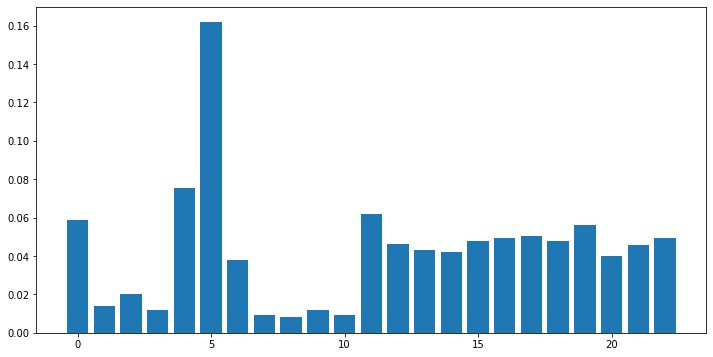

In [583]:
plt.bar([x for x in range(len(dt_importance))], dt_importance)
plt.show()

###### Mean squared error

In [520]:
mean_squared_error(Y0_test, dt_pred)

0.279486312943562

#### Random Forest

In [521]:
rf = RandomForestClassifier()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf_scores = cross_val_score(rf, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(rf_scores), std(rf_scores)))

Accuracy: 0.815 (0.004)


In [522]:
rf_recall = cross_val_score(rf, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(rf_recall), std(rf_recall)))

Recall: 0.369 (0.021)


In [523]:
rf_f1 = cross_val_score(rf, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(rf_f1), std(rf_f1)))
rf_auc = cross_val_score(rf, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('AUC: %.3f (%.3f)' % (mean(rf_auc), std(rf_auc)))

f1-score: 0.471 (0.014)
AUC: 0.760 (0.008)


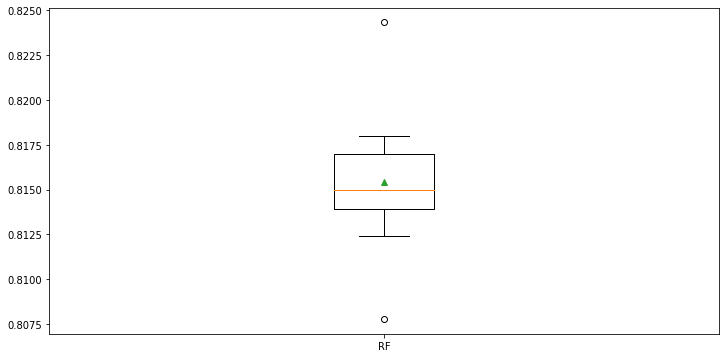

In [524]:
plt.boxplot(rf_scores, labels=['RF'], showmeans=True)
plt.show()

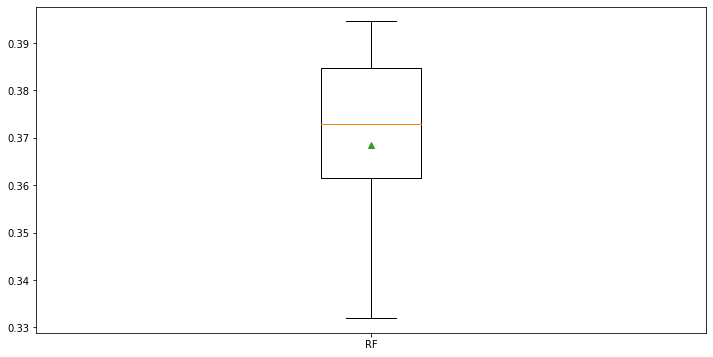

In [525]:
plt.boxplot(rf_recall, labels=['RF'], showmeans=True)
plt.show()

###### Prediction

In [526]:
rf.fit(X0_train, Y0_train)
rf_pred = rf.predict(X0_test)

###### Confusion matrix

In [527]:
print(confusion_matrix(Y0_test, rf_pred))

[[4305  271]
 [ 840  502]]


###### Clasification report

In [528]:
print(classification_report(Y0_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4576
           1       0.65      0.37      0.47      1342

    accuracy                           0.81      5918
   macro avg       0.74      0.66      0.68      5918
weighted avg       0.79      0.81      0.79      5918



###### ROC curve

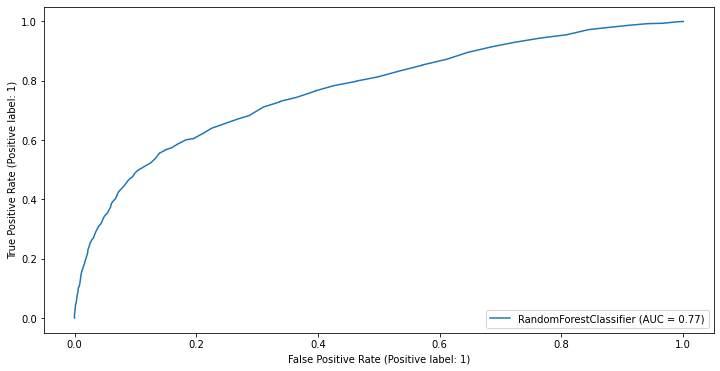

In [529]:
rf_displ = RocCurveDisplay.from_estimator(rf, X0_test, Y0_test)

###### Feature importance

In [584]:
rf_importance = rf.feature_importances_

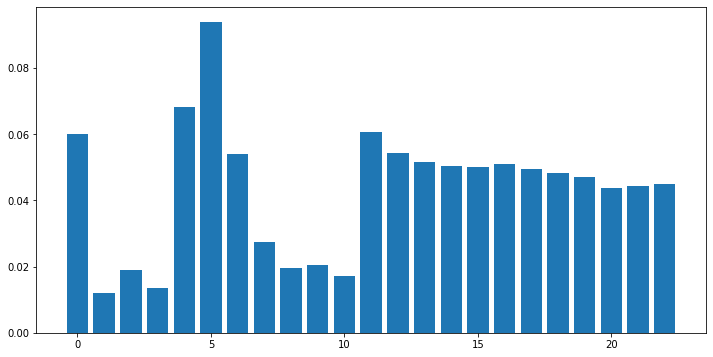

In [585]:
plt.bar([x for x in range(len(rf_importance))], rf_importance)
plt.show()

###### Mean Squared Error

In [530]:
mean_squared_error(Y0_test, rf_pred)

0.18773234200743494

#### Graphical Results

[Text(1, 0, 'kNN'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'MLP'),
 Text(5, 0, 'DT'),
 Text(6, 0, 'RF')]

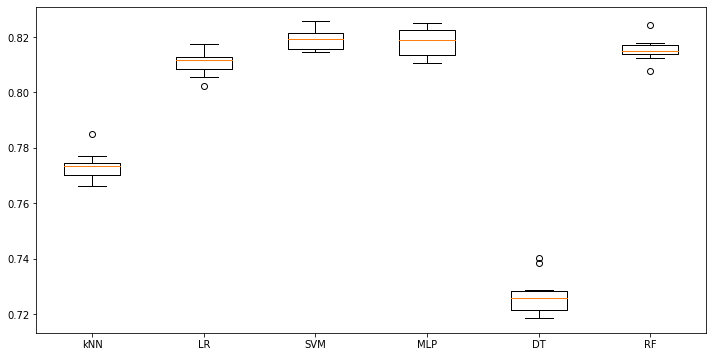

In [534]:
acc_dict = {'kNN':knn_scores, 'LR':lr_scores, 'SVM':svc_scores, 'MLP':mlp_scores, 'DT':dt_scores, 'RF':rf_scores}
fig, ax = plt.subplots()
ax.boxplot(acc_dict.values())
ax.set_xticklabels(acc_dict.keys())

[Text(1, 0, 'kNN'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'MLP'),
 Text(5, 0, 'DT'),
 Text(6, 0, 'RF')]

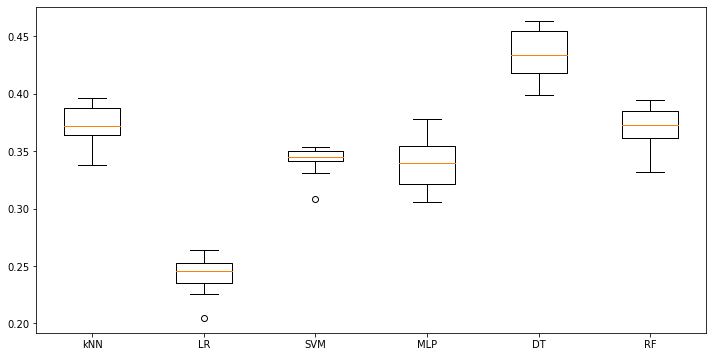

In [535]:
acc_dict = {'kNN':knn_recall, 'LR':lr_recall, 'SVM':svc_recall, 'MLP':mlp_recall, 'DT':dt_recall, 'RF':rf_recall}
fig, ax = plt.subplots()
ax.boxplot(acc_dict.values())
ax.set_xticklabels(acc_dict.keys())

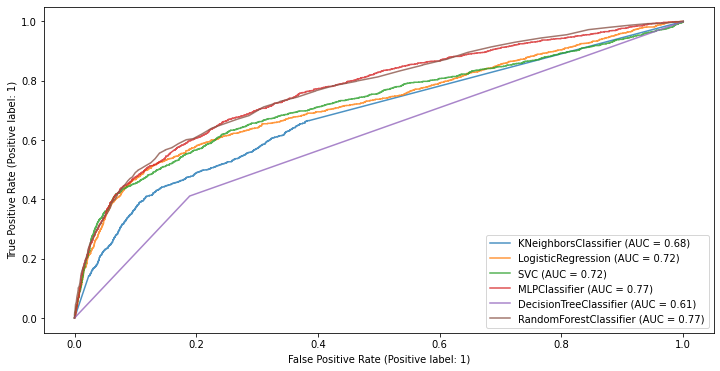

In [537]:
ax = plt.gca()
knn_displ.plot(ax=ax, alpha=0.8)
lr_displ.plot(ax=ax, alpha=0.8)
svc_displ.plot(ax=ax, alpha=0.8)
mlp_disp.plot(ax=ax, alpha=0.8)
dt_displ.plot(ax=ax, alpha=0.8)
rf_displ.plot(ax=ax, alpha=0.8)
plt.show()

## Dimensionality reduction 

### Correlation matrix

In [91]:
correlation_mat = X0_train.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

MARRIAGE_1   MARRIAGE_2    -0.978660
MARRIAGE_2   MARRIAGE_1    -0.978660
EDUCATION_1  EDUCATION_2   -0.706904
EDUCATION_2  EDUCATION_1   -0.706904
PAY_5_1      PAY_5_0       -0.543607
                              ...   
PAY_AMT4     PAY_4_2             NaN
PAY_AMT5     PAY_2_9             NaN
             PAY_4_2             NaN
PAY_AMT6     PAY_2_9             NaN
             PAY_4_2             NaN
Length: 7396, dtype: float64


In [34]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

### Reduce input variables dimensionality
Use PCA to calculate a projection of a dataset and select a number of dimensions or principal components of the projection to use as input to a model.

In [40]:
from sklearn.decomposition import PCA 

###### 99% of variance

In [589]:
pca = PCA(n_components = 0.99).fit(X0_train)
reduced_99 = pca.transform(X0_train)
reduced_99_t = pca.transform(X0_test)

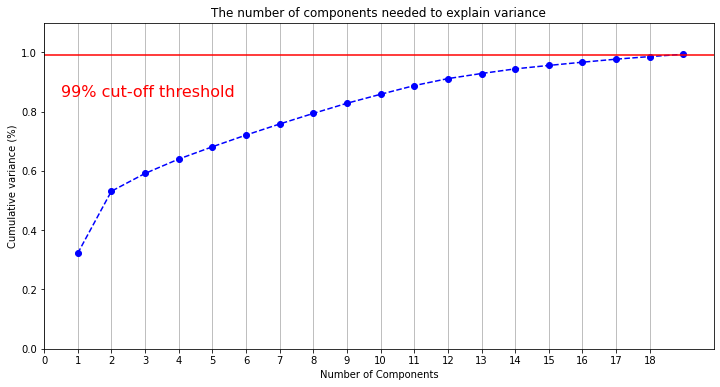

In [591]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 20, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 19, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

###### 95% of variance

In [52]:
pca_95 = PCA(0.95).fit(X0_train)
reduced_95 = pca_95.transform(X0_train)
reduced_95_t = pca_95.transform(X0_test)

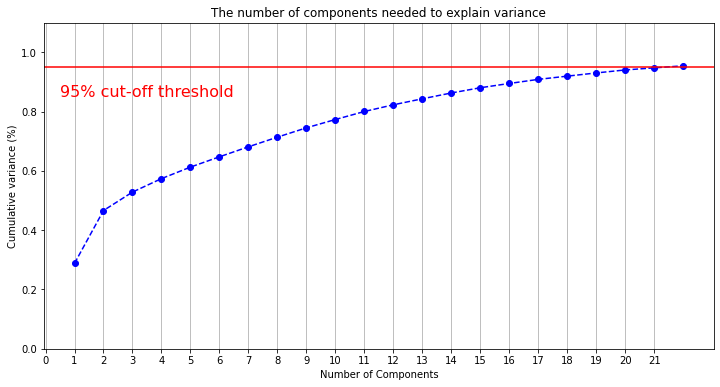

In [55]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 23, step=1)
y = np.cumsum(pca_95.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

###### 90% of variance

In [595]:
pca = PCA(n_components = 0.90).fit(X0_train)
reduced_90 = pca.transform(X0_train)
reduced_90_t = pca.transform(X0_test)

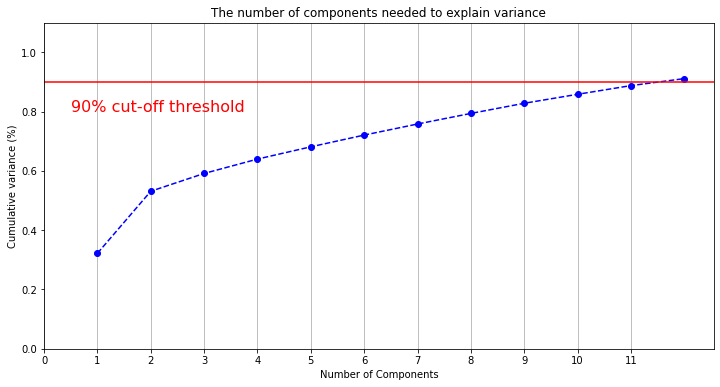

In [597]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 12, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.80, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

###### 80% of variance

In [598]:
pca = PCA(n_components = 0.80).fit(X0_train)
reduced_80 = pca.transform(X0_train)
reduced_80_t = pca.transform(X0_test)

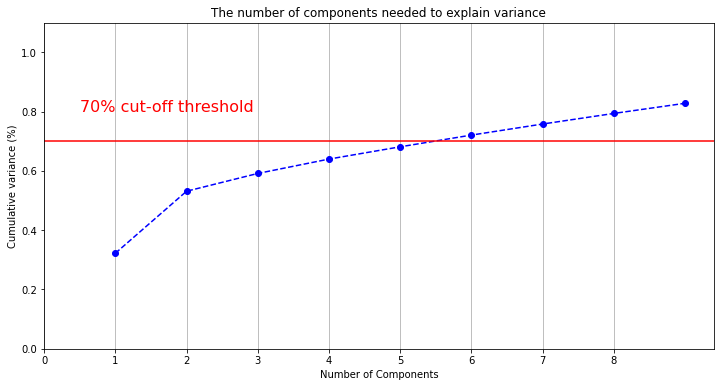

In [599]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 9, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.70, color='r', linestyle='-')
plt.text(0.5, 0.80, '70% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

###### 50% of variance

In [600]:
pca = PCA(n_components = 0.50).fit(X0_train)
reduced_50 = pca.transform(X0_train)
reduced_50_t = pca.transform(X0_test)

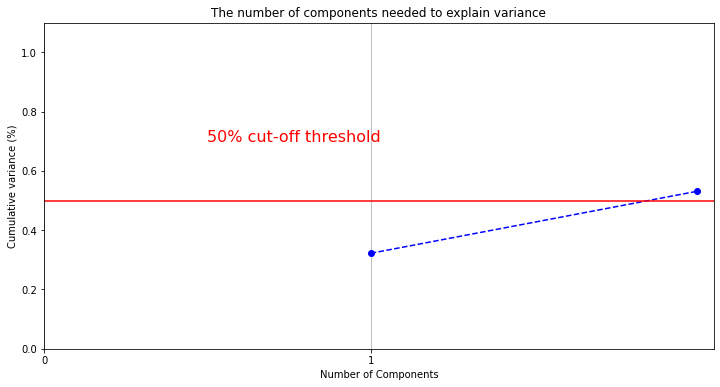

In [602]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 3, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 2, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.50, color='r', linestyle='-')
plt.text(0.5, 0.70, '50% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#### Cross validation

##### k-Nearest neighbor

In [687]:
steps = [('pca', pca_95),('knn', KNeighborsClassifier(n_neighbors=5, weights='distance'))]
knn_pca = Pipeline(steps=steps)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn_pca_scores = cross_validate(knn_pca, reduced_95, Y0_train, scoring=('accuracy','recall','f1','roc_auc'), cv=cv, n_jobs=-1)

In [689]:
print('Accuracy: %.3f (%.3f)' % (np.mean(knn_pca_scores['test_accuracy']), std(knn_pca_scores['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(knn_pca_scores['test_recall']), std(knn_pca_scores['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(knn_pca_scores['test_f1']), std(knn_pca_scores['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(knn_pca_scores['test_roc_auc']), std(knn_pca_scores['test_roc_auc'])))

Accuracy: 0.794 (0.005)
Recall: 0.370 (0.021)
f1-score: 0.444 (0.017)
ROC-curve: 0.707 (0.009)


###### Prediction

In [690]:
knn_pca.fit(reduced_95, Y0_train)
knn_pca_pred = knn_pca.predict(reduced_95_t)

###### Confusion matrix

In [691]:
print(confusion_matrix(Y0_test, knn_pca_pred))

[[4180  396]
 [ 854  488]]


###### Classification report

In [692]:
print(classification_report(Y0_test, knn_pca_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4576
           1       0.55      0.36      0.44      1342

    accuracy                           0.79      5918
   macro avg       0.69      0.64      0.65      5918
weighted avg       0.77      0.79      0.77      5918



###### ROC curve

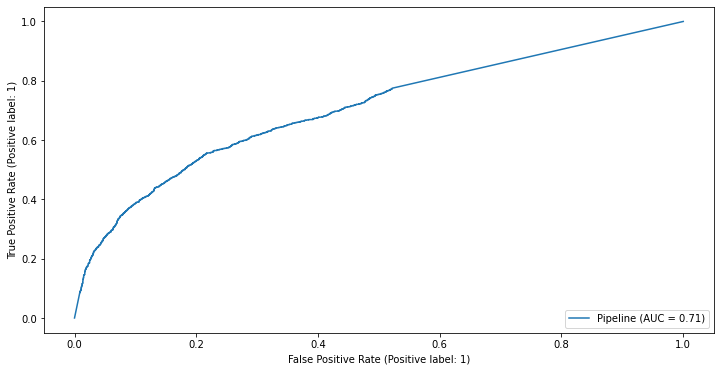

In [693]:
knn_pca_displ = RocCurveDisplay.from_estimator(knn_pca, reduced_95_t, Y0_test)


##### Logistic regression

In [706]:
steps = [('pca', pca_95),('lr', LogisticRegression(solver='liblinear', max_iter=90, class_weight='balanced'))]
lr_pca = Pipeline(steps=steps)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
lr_pca_scores = cross_validate(lr_pca, reduced_95, Y0_train, scoring=('accuracy','recall','f1','roc_auc'), cv=cv, n_jobs=-1)

In [707]:
print('Accuracy: %.3f (%.3f)' % (np.mean(lr_pca_scores['test_accuracy']), std(lr_pca_scores['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(lr_pca_scores['test_recall']), std(lr_pca_scores['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(lr_pca_scores['test_f1']), std(lr_pca_scores['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(lr_pca_scores['test_roc_auc']), std(lr_pca_scores['test_roc_auc'])))

Accuracy: 0.698 (0.012)
Recall: 0.633 (0.010)
f1-score: 0.482 (0.015)
ROC-curve: 0.720 (0.010)


###### Prediction

In [708]:
lr_pca.fit(reduced_95, Y0_train)
lr_pca_pred = lr_pca.predict(reduced_95_t)

###### Confusion matrix

In [709]:
print(confusion_matrix(Y0_test, lr_pca_pred))

[[3294 1282]
 [ 512  830]]


###### Classification report

In [710]:
print(classification_report(Y0_test, lr_pca_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      4576
           1       0.39      0.62      0.48      1342

    accuracy                           0.70      5918
   macro avg       0.63      0.67      0.63      5918
weighted avg       0.76      0.70      0.72      5918



###### ROC curve

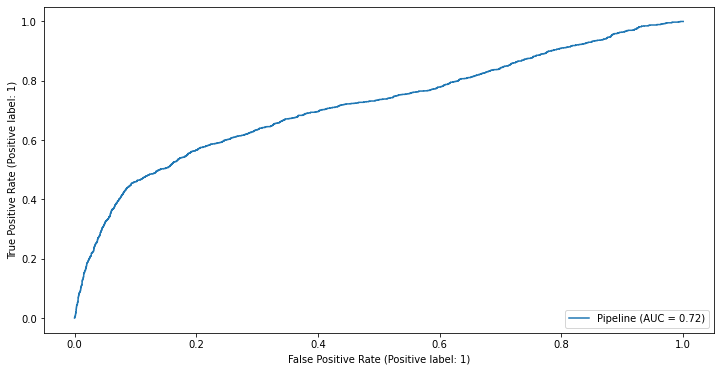

In [711]:
lr_pca_displ = RocCurveDisplay.from_estimator(lr_pca, reduced_95_t, Y0_test)

##### Support Vector Machine (SVM)

In [714]:
steps = [('pca', pca_95),('svm', SVC(kernel='linear', degree=3, gamma='scale', class_weight='balanced'))]
svm_pca = Pipeline(steps=steps)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
svm_pca_scores = cross_validate(svm_pca, reduced_95, Y0_train, scoring=('accuracy','recall','f1','roc_auc'), cv=cv, n_jobs=-1)

In [715]:
print('Accuracy: %.3f (%.3f)' % (np.mean(svm_pca_scores['test_accuracy']), std(svm_pca_scores['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(svm_pca_scores['test_recall']), std(svm_pca_scores['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(svm_pca_scores['test_f1']), std(svm_pca_scores['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(svm_pca_scores['test_roc_auc']), std(svm_pca_scores['test_roc_auc'])))

Accuracy: 0.787 (0.009)
Recall: 0.501 (0.014)
f1-score: 0.510 (0.015)
ROC-curve: 0.716 (0.011)


###### Prediction

In [716]:
svm_pca.fit(reduced_95, Y0_train)
svm_pca_pred = svm_pca.predict(reduced_95_t)

###### Confusion matrix

In [717]:
print(confusion_matrix(Y0_test, svm_pca_pred))

[[3984  592]
 [ 674  668]]


###### Classification report

In [718]:
print(classification_report(Y0_test, svm_pca_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4576
           1       0.53      0.50      0.51      1342

    accuracy                           0.79      5918
   macro avg       0.69      0.68      0.69      5918
weighted avg       0.78      0.79      0.78      5918



###### ROC curve

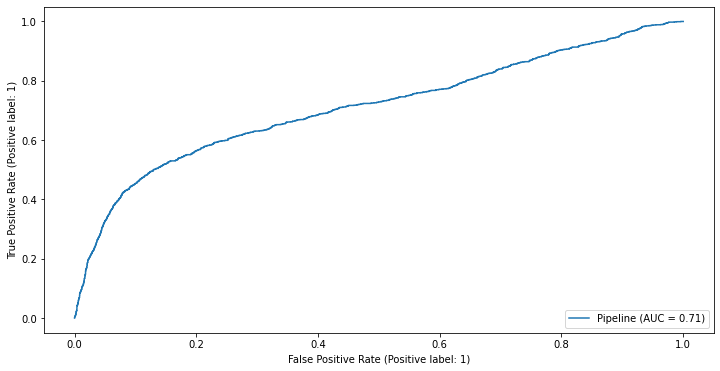

In [719]:
svm_pca_displ = RocCurveDisplay.from_estimator(svm_pca, reduced_95_t, Y0_test)

##### Multi-layer Perceptron Classifier

In [721]:
steps = [('pca', pca_95), ('mlp', MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam'))]
mlp_pca = Pipeline(steps=steps)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
mlp_pca_scores = cross_validate(mlp_pca, reduced_95, Y0_train, scoring=('accuracy','recall','f1','roc_auc'), cv=cv, n_jobs=-1)   

In [722]:
print('Accuracy: %.3f (%.3f)' % (np.mean(mlp_pca_scores['test_accuracy']), std(mlp_pca_scores['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(mlp_pca_scores['test_recall']), std(mlp_pca_scores['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(mlp_pca_scores['test_f1']), std(mlp_pca_scores['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(mlp_pca_scores['test_roc_auc']), std(mlp_pca_scores['test_roc_auc'])))

Accuracy: 0.817 (0.004)
Recall: 0.354 (0.041)
f1-score: 0.461 (0.036)
ROC-curve: 0.758 (0.021)


###### Prediction

In [723]:
mlp_pca.fit(reduced_95, Y0_train)
mlp_pca_pred = mlp_pca.predict(reduced_95_t)

###### Confusion matrix

In [744]:
print(confusion_matrix(Y0_test, mlp_pca_pred))

[[4419  157]
 [1005  337]]


###### Classification report

In [724]:
print(classification_report(Y0_test, mlp_pca_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4576
           1       0.68      0.25      0.37      1342

    accuracy                           0.80      5918
   macro avg       0.75      0.61      0.63      5918
weighted avg       0.78      0.80      0.77      5918



###### ROC curve

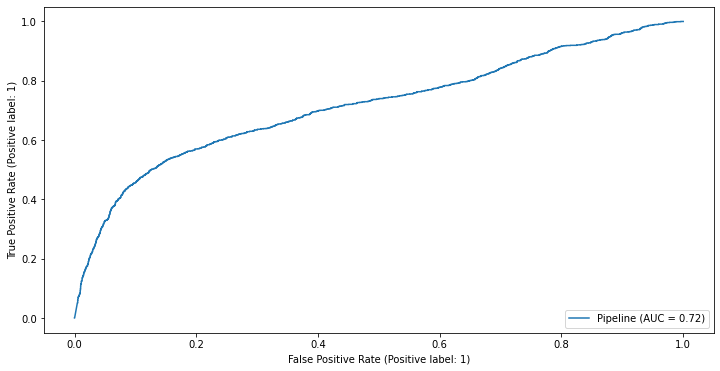

In [725]:
mlp_pca_displ = RocCurveDisplay.from_estimator(mlp_pca, reduced_95_t, Y0_test)

##### Decision tree classifier

In [727]:
steps = [('pca', pca_95), ('dt', DecisionTreeClassifier(class_weight='balanced'))]
dt_pca = Pipeline(steps=steps)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
dt_pca_scores = cross_validate(dt_pca, reduced_95, Y0_train, scoring=('accuracy','recall','f1','roc_auc'), cv=cv, n_jobs=-1)

In [728]:
print('Accuracy: %.3f (%.3f)' % (np.mean(dt_pca_scores['test_accuracy']), std(dt_pca_scores['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(dt_pca_scores['test_recall']), std(dt_pca_scores['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(dt_pca_scores['test_f1']), std(dt_pca_scores['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(dt_pca_scores['test_roc_auc']), std(dt_pca_scores['test_roc_auc'])))

Accuracy: 0.726 (0.008)
Recall: 0.384 (0.027)
f1-score: 0.384 (0.026)
ROC-curve: 0.604 (0.015)


###### Prediction

In [729]:
dt_pca.fit(reduced_95, Y0_train)
dt_pca_pred = dt_pca.predict(reduced_95_t)

###### Confusion matrix

In [730]:
print(confusion_matrix(Y0_test, dt_pca_pred))

[[3780  796]
 [ 806  536]]


###### Classification report

In [731]:
print(classification_report(Y0_test, dt_pca_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      4576
           1       0.40      0.40      0.40      1342

    accuracy                           0.73      5918
   macro avg       0.61      0.61      0.61      5918
weighted avg       0.73      0.73      0.73      5918



###### ROC curve

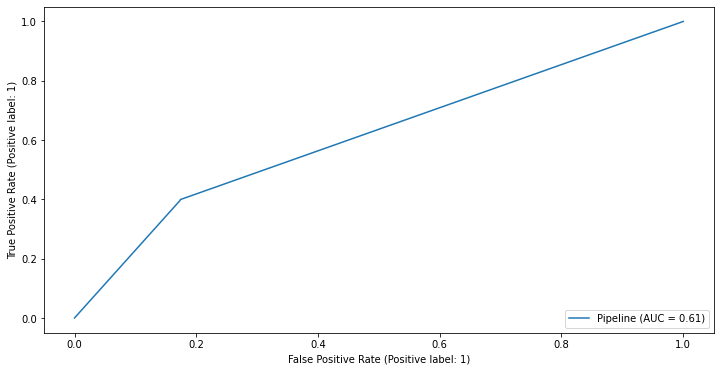

In [732]:
dt_pca_displ = RocCurveDisplay.from_estimator(dt_pca, reduced_95_t, Y0_test)

##### Random Forest

In [734]:
steps = [('pca', pca_95), ('rf', RandomForestClassifier(class_weight='balanced'))]
rf_pca = Pipeline(steps=steps)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf_pca_scores = cross_validate(rf_pca, reduced_95, Y0_train, scoring=('accuracy','recall','f1','roc_auc'), cv=cv, n_jobs=-1)   

In [735]:
print('Accuracy: %.3f (%.3f)' % (np.mean(rf_pca_scores['test_accuracy']), std(rf_pca_scores['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(rf_pca_scores['test_recall']), std(rf_pca_scores['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(rf_pca_scores['test_f1']), std(rf_pca_scores['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(rf_pca_scores['test_roc_auc']), std(rf_pca_scores['test_roc_auc'])))

Accuracy: 0.810 (0.006)
Recall: 0.327 (0.023)
f1-score: 0.433 (0.025)
ROC-curve: 0.748 (0.013)


###### Prediction

In [736]:
rf_pca.fit(reduced_95, Y0_train)
rf_pca_pred = rf_pca.predict(reduced_95_t)

###### Confusion matrix

In [737]:
print(confusion_matrix(Y0_test, rf_pca_pred))

[[4349  227]
 [ 890  452]]


###### Classification report

In [738]:
print(classification_report(Y0_test, rf_pca_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4576
           1       0.67      0.34      0.45      1342

    accuracy                           0.81      5918
   macro avg       0.75      0.64      0.67      5918
weighted avg       0.79      0.81      0.79      5918



###### ROC curve

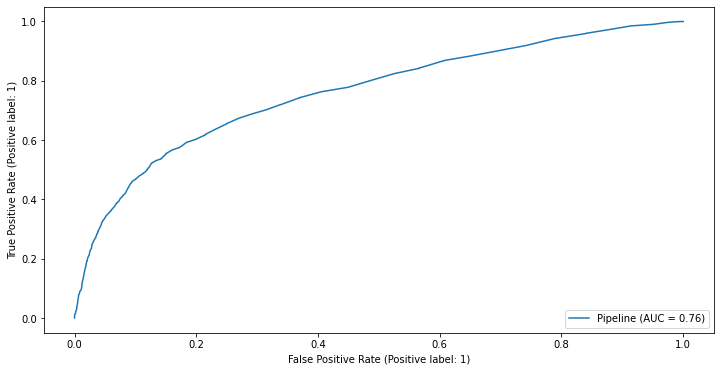

In [739]:
rf_pca_displ = RocCurveDisplay.from_estimator(rf_pca, reduced_95_t, Y0_test)

##### Graphical results

[Text(1, 0, 'kNN'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'MLP'),
 Text(5, 0, 'DT'),
 Text(6, 0, 'RF')]

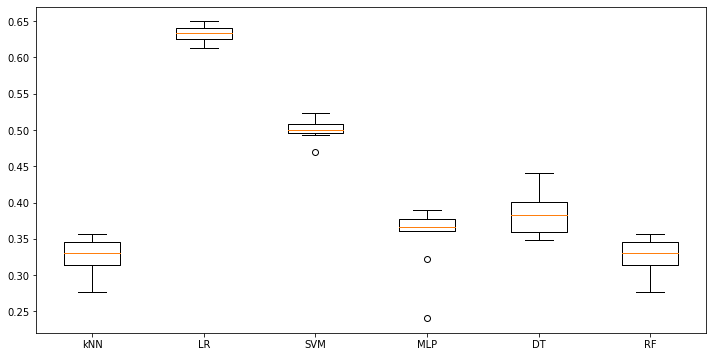

In [741]:
acc_pca_dict = {'kNN':rf_pca_scores['test_recall'], 'LR':lr_pca_scores['test_recall'], 'SVM':svm_pca_scores['test_recall'], 
        'MLP':mlp_pca_scores['test_recall'], 'DT':dt_pca_scores['test_recall'], 'RF':rf_pca_scores['test_recall']}
fig, ax = plt.subplots()
ax.boxplot(acc_pca_dict.values())
ax.set_xticklabels(acc_pca_dict.keys())

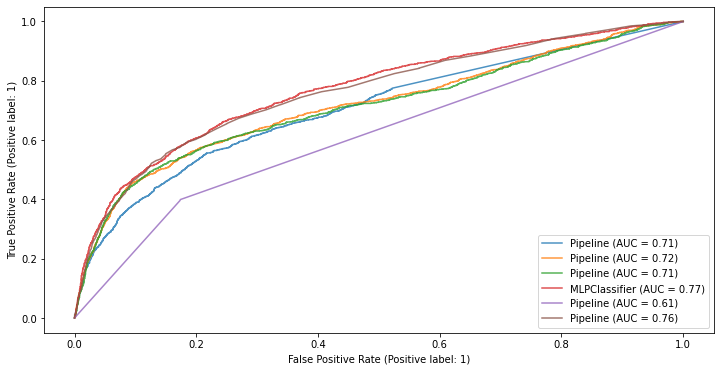

In [743]:
ax = plt.gca()
knn_pca_displ.plot(ax=ax, alpha=0.8)
lr_pca_displ.plot(ax=ax, alpha=0.8)
svm_pca_displ.plot(ax=ax, alpha=0.8)
mlp_disp.plot(ax=ax, alpha=0.8)
dt_pca_displ.plot(ax=ax, alpha=0.8)
rf_pca_displ.plot(ax=ax, alpha=0.8)

##### Plot Component analysis

In [62]:
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X0_train) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) 

,principal component 1,principal component 2
0,-4.835777,1.533138
1,0.749880,-0.128442
2,-1.968724,-0.342769
3,-4.828220,1.661238
4,-4.335236,2.327027


In [63]:
finalDf = pd.concat([principalDf,pd.DataFrame(Y0_train,columns = ['default'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,default
0,-4.835777,1.533138,1.0
1,0.749880,-0.128442,1.0
2,-1.968724,-0.342769,0.0
3,-4.828220,1.661238,0.0
4,-4.335236,2.327027,0.0


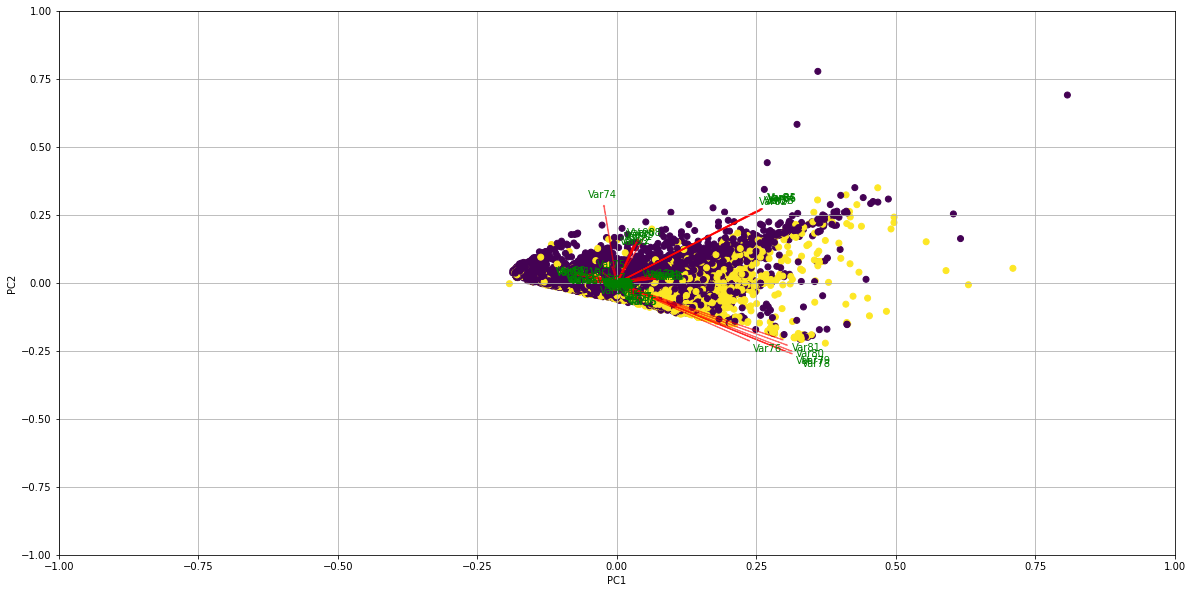

In [77]:
y = Y0_train
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(20,10))
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')          
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

## Subsampling and oversampling techniques
* **Random oversampling** - Involves randomly duplicating examples from the minority class and adding them to the training dataset.
* **Random undersampling** - Involves randomly selecting examples from the majority class to delete from the training dataset.
* **SMOTE** - Works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.
* **Tomek links** - Refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes.
* **Edited Nearest Neighbors** - This rule involves using k=3 nearest neighbors to locate those examples in a dataset that are misclassified and that are then removed.

In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

### Cross Validation

#### k-Nearest Neighbor

##### Random over-sampling & Random over-sampling

In [41]:
steps = [('o', RandomOverSampler()), ('u', RandomUnderSampler()), ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance'))]
knn_overunder = Pipeline(steps=steps)

In [42]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_over_under = cross_validate(knn_overunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [43]:
print('Accuracy: %.3f (%.3f)' % (np.mean(knn_over_under['test_accuracy']), std(knn_over_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(knn_over_under['test_recall']), std(knn_over_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(knn_over_under['test_f1']), std(knn_over_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(knn_over_under['test_roc_auc']), std(knn_over_under['test_roc_auc'])))

Accuracy: 0.686 (0.006)
Recall: 0.544 (0.021)
f1-score: 0.436 (0.012)
ROC-curve: 0.666 (0.009)


###### Prediction

In [44]:
knn_overunder.fit(X0_train, Y0_train)
pred_knn_over_under = knn_overunder.predict(X0_test)

###### Confusion matrix

In [45]:
print(confusion_matrix(Y0_test, pred_knn_over_under))

[[3239 1327]
 [ 620  722]]


###### ROC curve

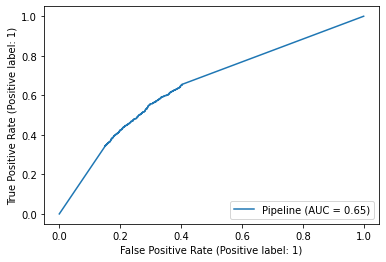

In [46]:
knn_displ_overunder = RocCurveDisplay.from_estimator(knn_overunder, X0_test, Y0_test)

##### SMOTE & Random under-sampling

In [143]:
steps = [('o', SMOTE(ratio='minority')))('u', RandomUnderSampler()), ('knn', KNeighborsClassifier(n_neighbors=3))]
knn_smoteunder = Pipeline(steps=steps)

In [144]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_smote_under = cross_validate(knn_smoteunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1, error_score='raise')

In [145]:
print('Accuracy: %.3f (%.3f)' % (np.mean(knn_smote_under['test_accuracy']), std(knn_smote_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(knn_smote_under['test_recall']), std(knn_smote_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(knn_smote_under['test_f1']), std(knn_smote_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(knn_smote_under['test_roc_auc']), std(knn_smote_under['test_roc_auc'])))

Accuracy: 0.657 (0.009)
Recall: 0.641 (0.019)
f1-score: 0.454 (0.011)
ROC-curve: 0.690 (0.012)


###### Prediction

In [130]:
knn_smoteunder.fit(X0_train, Y0_train)
pred_knn_smote_under = knn_smoteunder.predict(X0_test)

###### Confusion matrix

In [131]:
print(confusion_matrix(Y0_test, pred_knn_smote_under))

[[2953 1613]
 [ 481  861]]


###### ROC curve

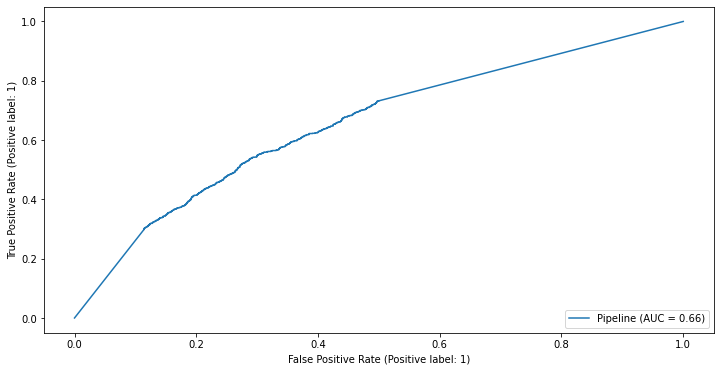

In [336]:
knn_displ_smoteunder = RocCurveDisplay.from_estimator(knn_smoteunder, X0_test, Y0_test)

##### SMOTE & Tomek links

In [183]:
counter = Counter(Y0_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X0_train, Y0_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 18375, 1: 5253})
After Counter({0: 17906, 1: 17906})


In [186]:
knn_smotetomek = KNeighborsClassifier(n_neighbors=3, weights='distance')
cv = RepeatedStratifiedKFold(n_splits=5, random_state=100)
knn_smote_tomek = cross_validate(knn_smotetomek, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [187]:
print('Accuracy: %.3f (%.3f)' % (np.mean(knn_smote_tomek['test_accuracy']), std(knn_smote_tomek['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(knn_smote_tomek['test_recall']), std(knn_smote_tomek['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(knn_smote_tomek['test_f1']), std(knn_smote_tomek['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(knn_smote_tomek['test_roc_auc']), std(knn_smote_tomek['test_roc_auc'])))

Accuracy: 0.773 (0.004)
Recall: 0.377 (0.014)
f1-score: 0.425 (0.013)
ROC-curve: 0.682 (0.008)


###### Prediction

In [188]:
knn_smotetomek.fit(X0_train, Y0_train)
pred_knn_smote_tomek = knn_smotetomek.predict(X0_test)

###### Confusion matrix

In [189]:
print(confusion_matrix(Y0_test, pred_knn_smote_tomek))

[[4004  562]
 [ 822  520]]


###### ROC curve

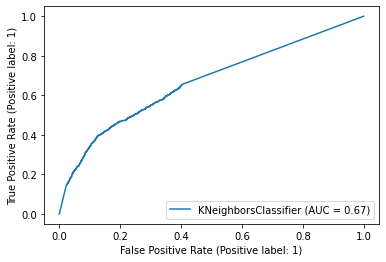

In [191]:
knn_displ_smote_tomek = RocCurveDisplay.from_estimator(knn_smotetomek, X0_test, Y0_test)

##### Smote & Edited Nearest Neighbors (ENN) Undersampling

In [192]:
counter = Counter(Y0_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X0_train, Y0_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 18375, 1: 5253})
After Counter({1: 13929, 0: 9578})


In [196]:
knn_smoteenn = KNeighborsClassifier(n_neighbors=3, weights='distance')
cv = RepeatedStratifiedKFold(n_splits=5, random_state=100)
knn_smote_enn = cross_validate(knn_smoteenn, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [197]:
print('Accuracy: %.3f (%.3f)' % (np.mean(knn_smote_enn['test_accuracy']), std(knn_smote_enn['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(knn_smote_enn['test_recall']), std(knn_smote_enn['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(knn_smote_enn['test_f1']), std(knn_smote_enn['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(knn_smote_enn['test_roc_auc']), std(knn_smote_enn['test_roc_auc'])))

Accuracy: 0.773 (0.004)
Recall: 0.377 (0.014)
f1-score: 0.425 (0.013)
ROC-curve: 0.682 (0.008)


In [198]:
knn_smoteenn.fit(X0_train, Y0_train)
pred_knn_smote_enn = knn_smoteenn.predict(X0_test)
print(confusion_matrix(Y0_test, pred_knn_smote_enn))

[[4004  562]
 [ 822  520]]


###### ROC curve

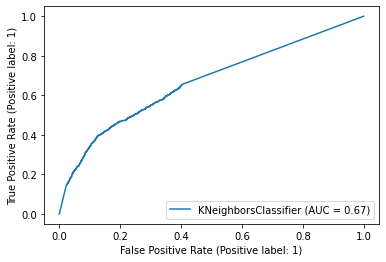

In [199]:
knn_displ_smote_tomek = RocCurveDisplay.from_estimator(knn_smotetomek, X0_test, Y0_test)

#### Logistic Regression

##### Random over-sampling & Random over-sampling

In [92]:
steps = [('o', RandomOverSampler()), ('u', RandomUnderSampler()), ('lr', LogisticRegression(solver='liblinear', max_iter=90, class_weight='balanced'))]
lr_overunder = Pipeline(steps=steps)

In [93]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
lr_over_under = cross_validate(lr_overunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc', ), cv=cv, n_jobs=-1)

In [94]:
print('Accuracy: %.3f (%.3f)' % (np.mean(lr_over_under['test_accuracy']), std(lr_over_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(lr_over_under['test_recall']), std(lr_over_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(lr_over_under['test_f1']), std(lr_over_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(lr_over_under['test_roc_auc']), std(lr_over_under['test_roc_auc'])))

Accuracy: 0.776 (0.008)
Recall: 0.581 (0.023)
f1-score: 0.536 (0.016)
ROC-curve: 0.769 (0.012)


###### Prediction

In [95]:
lr_overunder.fit(X0_train, Y0_train)
pred_lr_over_under = lr_overunder.predict(X0_test)

###### Confusion matrix

In [96]:
print(confusion_matrix(Y0_test, pred_lr_over_under))

[[3808  758]
 [ 578  764]]


###### ROC curve

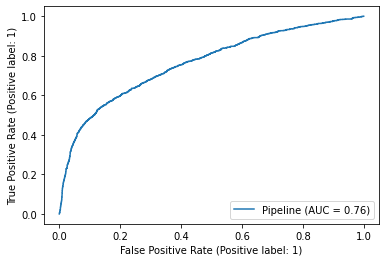

In [219]:
lr_displ_overunder = RocCurveDisplay.from_estimator(lr_overunder, X0_test, Y0_test)

##### SMOTE & Random under-sampling

In [157]:
steps = [('o', SMOTE(sampling_strategy=1)), ('u', RandomUnderSampler(sampling_strategy=0.5)), ('lr', LogisticRegression(solver='liblinear', max_iter=90, class_weight='balanced'))]
lr_smoteunder = Pipeline(steps=steps)

In [158]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lr_smote_under = cross_validate(lr_smoteunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/suelo/Desktop/venv/lib/python3.8/site-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/home/suelo/Desktop/venv/lib/python3.8/site-packages/imblearn/pipeline.py", line 220, in _fit
    X, y, fitted_transformer = fit_res

In [123]:
print('Accuracy: %.3f (%.3f)' % (np.mean(lr_smote_under['test_accuracy']), std(lr_smote_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(lr_smote_under['test_recall']), std(lr_smote_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(lr_smote_under['test_f1']), std(lr_smote_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(lr_smote_under['test_roc_auc']), std(lr_smote_under['test_roc_auc'])))

Accuracy: nan (nan)
Recall: nan (nan)
f1-score: nan (nan)
ROC-curve: nan (nan)


###### Prediction

In [ ]:
lr_smoteunder.fit(X0_train, Y0_train)
pred_lr_smote_under = lr_smoteunder.predict(X0_test)

###### Confusion matrix

In [ ]:
print(confusion_matrix(Y0_test, pred_lr_smote_under))

[[3364 1231]
 [ 650  657]]


###### ROC curve

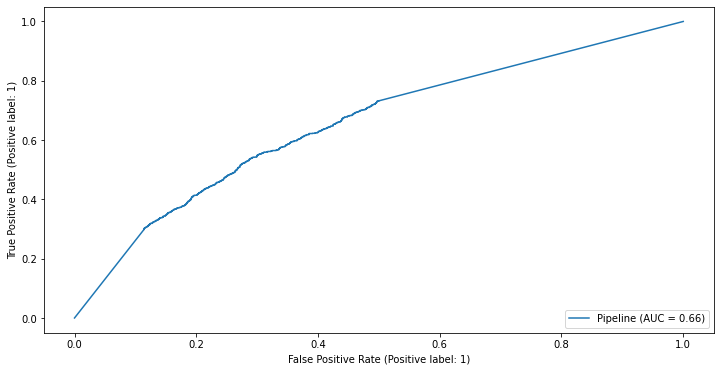

In [ ]:
lr_displ_smoteunder = RocCurveDisplay.from_estimator(lr_smoteunder, X0_test, Y0_test)

##### SMOTE & Tomek links

In [172]:
counter = Counter(Y0_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X0_train, Y0_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 18375, 1: 5253})
After Counter({0: 17906, 1: 17906})


In [175]:
lr_smotetomek = LogisticRegression(solver='liblinear', max_iter=90, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, random_state=100)
lr_smote_tomek = cross_validate(lr_smotetomek, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [176]:
print('Accuracy: %.3f (%.3f)' % (np.mean(lr_smote_tomek['test_accuracy']), std(lr_smote_tomek['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(lr_smote_tomek['test_recall']), std(lr_smote_tomek['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(lr_smote_tomek['test_f1']), std(lr_smote_tomek['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(lr_smote_tomek['test_roc_auc']), std(lr_smote_tomek['test_roc_auc'])))

Accuracy: 0.777 (0.005)
Recall: 0.581 (0.014)
f1-score: 0.537 (0.010)
ROC-curve: 0.769 (0.008)


###### Prediction

In [180]:
lr_smotetomek.fit(X0_train, Y0_train)
pred_lr_smote_tomek = lr_smotetomek.predict(X0_test)

[[3802  764]
 [ 577  765]]


###### Confusion matrix

In [ ]:
print(confusion_matrix(Y0_test, pred_lr_smote_tomek))

###### ROC curve

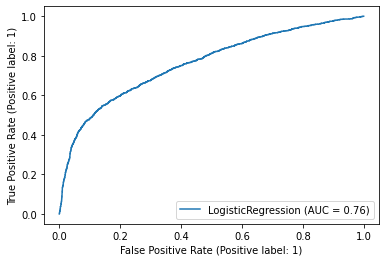

In [182]:
lr_displ_smoteenn = RocCurveDisplay.from_estimator(lr_smotetomek, X0_test, Y0_test)

##### Smote & Edited Nearest Neighbors (ENN) Undersampling

In [163]:
counter = Counter(Y0_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X0_train, Y0_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 18375, 1: 5253})
After Counter({1: 13929, 0: 9549})


In [166]:
model = LogisticRegression(solver='liblinear', max_iter=90, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, random_state=100)
lr_smote_enn = cross_validate(model, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [167]:
print('Accuracy: %.3f (%.3f)' % (np.mean(lr_smote_enn['test_accuracy']), std(lr_smote_enn['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(lr_smote_enn['test_recall']), std(lr_smote_enn['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(lr_smote_enn['test_f1']), std(lr_smote_enn['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(lr_smote_enn['test_roc_auc']), std(lr_smote_enn['test_roc_auc'])))

Accuracy: 0.777 (0.005)
Recall: 0.581 (0.014)
f1-score: 0.537 (0.010)
ROC-curve: 0.769 (0.008)


In [171]:
model.fit(X0_train, Y0_train)
pred_lr_smote_enn = model.predict(X0_test)
print(confusion_matrix(Y0_test, pred_lr_smote_enn))

[[3802  764]
 [ 577  765]]


###### ROC curve

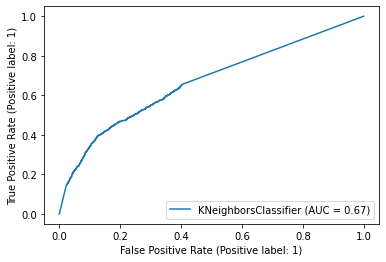

In [224]:
knn_displ_smote_enn = RocCurveDisplay.from_estimator(knn_smoteenn, X0_test, Y0_test)

#### Multi-layer Perceptron Classifier

##### Random over-sampling & Random over-sampling

In [99]:
steps = [('o', RandomOverSampler()), ('u', RandomUnderSampler()), ('mlp', MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam'))]
mlp_overunder = Pipeline(steps=steps)

In [100]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
mlp_over_under = cross_validate(mlp_overunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc', ), cv=cv, n_jobs=-1)

In [101]:
print('Accuracy: %.3f (%.3f)' % (np.mean(mlp_over_under['test_accuracy']), std(mlp_over_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(mlp_over_under['test_recall']), std(mlp_over_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(mlp_over_under['test_f1']), std(mlp_over_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(mlp_over_under['test_roc_auc']), std(mlp_over_under['test_roc_auc'])))

Accuracy: 0.759 (0.009)
Recall: 0.623 (0.024)
f1-score: 0.534 (0.015)
ROC-curve: 0.777 (0.012)


###### Prediction

In [102]:
mlp_overunder.fit(X0_train, Y0_train)
pred_mlp_over_under = mlp_overunder.predict(X0_test)

###### Confusion matrix

In [103]:
print(confusion_matrix(Y0_test, pred_mlp_over_under))

[[3646  920]
 [ 538  804]]


###### ROC curve

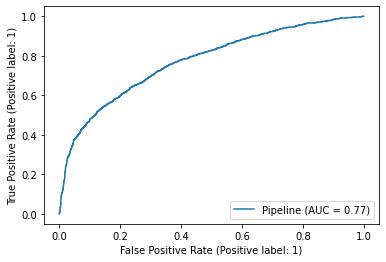

In [222]:
mlp_displ_overunder = RocCurveDisplay.from_estimator(mlp_overunder, X0_test, Y0_test)

##### SMOTE & Random under-sampling

In [ ]:
steps = [('o', SMOTE()), ('u', RandomUnderSampler()), ('mlp', MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam'))]
mlp_smoteunder = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
mlp_smote_under = cross_validate(mlp_smoteunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(mlp_smote_under['test_accuracy']), std(mlp_smote_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(mlp_smote_under['test_recall']), std(mlp_smote_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(mlp_smote_under['test_f1']), std(mlp_smote_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(mlp_smote_under['test_roc_auc']), std(mlp_smote_under['test_roc_auc'])))

Accuracy: 0.692 (0.009)
ROC-curve: 0.670 (0.011)
Recall: 0.529 (0.020)


###### Prediction

In [ ]:
mlp_smoteunder.fit(X0_train, Y0_train)
pred_mlp_smote_under = mlp_smoteunder.predict(X0_test)

###### Confusion matrix

In [ ]:
print(confusion_matrix(Y0_test, pred_mlp_smote_under))

[[3364 1231]
 [ 650  657]]


###### ROC curve

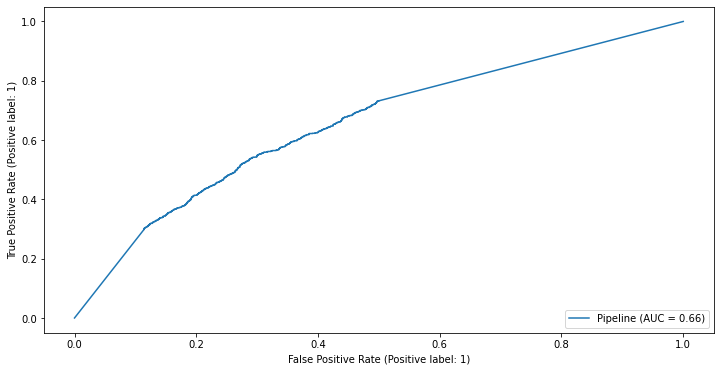

In [ ]:
mlp_displ_smoteunder = RocCurveDisplay.from_estimator(mlp_smoteunder, X0_test, Y0_test)

##### SMOTE & Tomek links

In [200]:
counter = Counter(Y0_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X0_train, Y0_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 18375, 1: 5253})
After Counter({0: 17906, 1: 17906})


In [205]:
mlp_smotetomek = MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam')
cv = RepeatedStratifiedKFold(n_splits=5, random_state=100)
mlp_smote_tomek = cross_validate(mlp_smotetomek, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [206]:
print('Accuracy: %.3f (%.3f)' % (np.mean(mlp_smote_tomek['test_accuracy']), std(mlp_smote_tomek['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(mlp_smote_tomek['test_recall']), std(mlp_smote_tomek['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(mlp_smote_tomek['test_f1']), std(mlp_smote_tomek['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(mlp_smote_tomek['test_roc_auc']), std(mlp_smote_tomek['test_roc_auc'])))

Accuracy: 0.819 (0.004)
Recall: 0.365 (0.015)
f1-score: 0.472 (0.014)
ROC-curve: 0.776 (0.007)


###### Prediction

In [207]:
mlp_smotetomek.fit(X0_train, Y0_train)
pred_mlp_smote_tomek = mlp_smotetomek.predict(X0_test)

###### Confusion matrix

In [208]:
print(confusion_matrix(Y0_test, pred_mlp_smote_tomek))

[[4361  205]
 [ 868  474]]


###### ROC curve

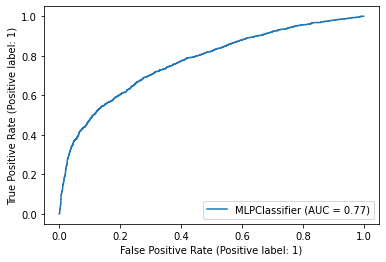

In [209]:
mlp_displ_smote_tomek = RocCurveDisplay.from_estimator(mlp_smotetomek, X0_test, Y0_test)

##### Smote & Edited Nearest Neighbors (ENN) Undersampling

In [210]:
counter = Counter(Y0_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X0_train, Y0_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 18375, 1: 5253})
After Counter({1: 14024, 0: 9639})


In [211]:
model = MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam')
cv = RepeatedStratifiedKFold(n_splits=5, random_state=100)
mlp_smote_enn = cross_validate(model, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [212]:
print('Accuracy: %.3f (%.3f)' % (np.mean(mlp_smote_enn['test_accuracy']), std(mlp_smote_enn['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(mlp_smote_enn['test_recall']), std(mlp_smote_enn['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(mlp_smote_enn['test_f1']), std(mlp_smote_enn['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(mlp_smote_enn['test_roc_auc']), std(mlp_smote_enn['test_roc_auc'])))

Accuracy: 0.819 (0.004)
Recall: 0.365 (0.015)
f1-score: 0.472 (0.014)
ROC-curve: 0.776 (0.007)


In [213]:
model.fit(X0_train, Y0_train)
pred_mlp_smote_enn = model.predict(X0_test)
print(confusion_matrix(Y0_test, pred_mlp_smote_enn))

[[4361  205]
 [ 868  474]]


###### ROC curve

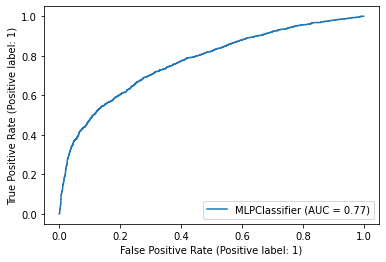

In [215]:
mlp_displ_smote_enn = RocCurveDisplay.from_estimator(model, X0_test, Y0_test)

In [ ]:
steps = [('o', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))), ('mlp', MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam'))]
mlp_smotetomek = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
mlp_smote_tomek = cross_validate(mlp_smotetomek, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(mlp_smote_tomek['test_accuracy']), std(mlp_smote_tomek['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(mlp_smote_tomek['test_recall']), std(mlp_smote_tomek['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(mlp_smote_tomek['test_f1']), std(mlp_smote_tomek['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(mlp_smote_tomek['test_roc_auc']), std(mlp_smote_tomek['test_roc_auc'])))

Accuracy: 0.681 (0.009)
ROC-curve: 0.671 (0.011)
Recall: 0.557 (0.017)


###### Prediction

In [ ]:
mlp_smotetomek.fit(X0_train, Y0_train)
pred_mlp_smote_tomek = mlp_smotetomek.predict(X0_test)

###### Confusion

In [ ]:
print(confusion_matrix(Y0_test, pred_mlp_smote_tomek))

[[3220 1375]
 [ 611  696]]


###### ROC curve

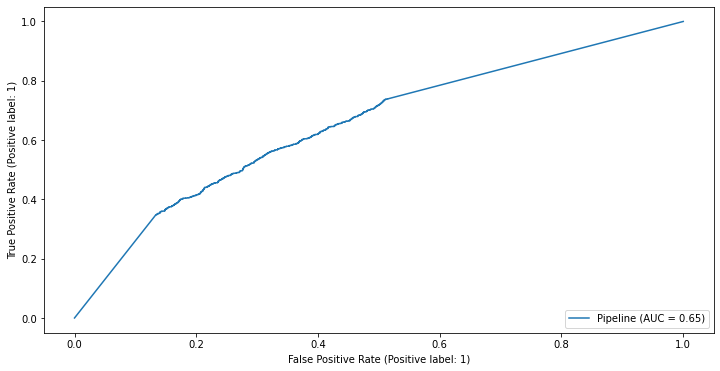

In [ ]:
mlp_displ_smotetomek = RocCurveDisplay.from_estimator(mlp_smotetomek, X0_test, Y0_test)

In [ ]:
steps = [('o', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))), ('mlp', MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam'))]
mlp_smoteenn = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
mlp_smote_enn = cross_validate(mlp_smoteenn, X0_train, Y0_train, scoring=('accuracy','roc_auc', 'recall'), cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(mlp_smote_enn['test_accuracy']), std(mlp_smote_enn['test_accuracy'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(mlp_smote_enn['test_roc_auc']), std(mlp_smote_enn['test_roc_auc'])))
print('Recall: %.3f (%.3f)' % (np.mean(mlp_smote_enn['test_recall']), std(mlp_smote_enn['test_recall'])))

Accuracy: 0.567 (0.007)
ROC-curve: 0.663 (0.011)
Recall: 0.744 (0.019)


###### Prediction

In [ ]:
mlp_smoteenn.fit(X0_train, Y0_train)
pred_mlp_smote_enn = mlp_smoteenn.predict(X0_test)

###### Confusion matrix

In [ ]:
print(confusion_matrix(Y0_test, pred_mlp_smote_enn))

[[2341 2254]
 [ 352  955]]


###### ROC curve

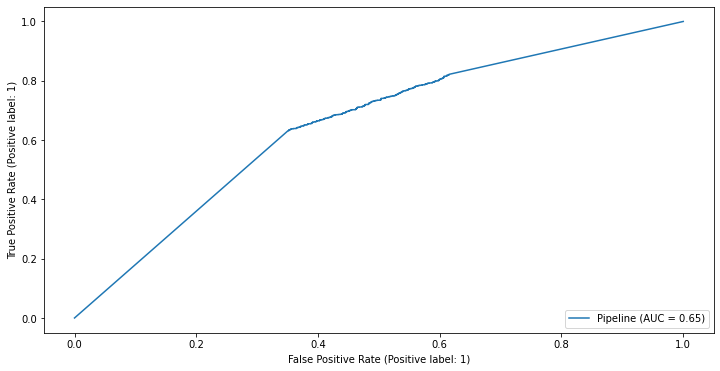

In [ ]:
mlp_displ_smoteenn = RocCurveDisplay.from_estimator(mlp_smoteenn, X0_test, Y0_test)

#### Decision tree clasifier

##### Random over-sampling & Random over-sampling

In [105]:
steps = [('o', RandomOverSampler()), ('u', RandomUnderSampler()), ('dt', DecisionTreeClassifier(class_weight='balanced'))]
dt_overunder = Pipeline(steps=steps)

In [106]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dt_over_under = cross_validate(dt_overunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc', ), cv=cv, n_jobs=-1)

In [107]:
print('Accuracy: %.3f (%.3f)' % (np.mean(dt_over_under['test_accuracy']), std(dt_over_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(dt_over_under['test_recall']), std(dt_over_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(dt_over_under['test_f1']), std(dt_over_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(dt_over_under['test_roc_auc']), std(dt_over_under['test_roc_auc'])))

Accuracy: 0.730 (0.007)
Recall: 0.402 (0.017)
f1-score: 0.398 (0.014)
ROC-curve: 0.613 (0.009)


###### Prediction

In [108]:
dt_overunder.fit(X0_train, Y0_train)
pred_dt_over_under = dt_overunder.predict(X0_test)

###### Confusion matrix

In [109]:
print(confusion_matrix(Y0_test, pred_dt_over_under))

[[3775  791]
 [ 836  506]]


###### ROC curve

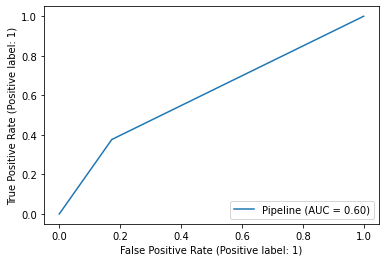

In [110]:
dt_displ_overunder = RocCurveDisplay.from_estimator(dt_overunder, X0_test, Y0_test)

##### SMOTE & Random under-sampling

In [ ]:
steps = [('o', SMOTE()), ('u', RandomUnderSampler()), ('dt', DecisionTreeClassifier(class_weight='balanced'))]
dt_smoteunder = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dt_smote_under = cross_validate(dt_smoteunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(dt_smote_under['test_accuracy']), std(dt_smote_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(dt_smote_under['test_recall']), std(dt_smote_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(dt_smote_under['test_f1']), std(dt_smote_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(dt_smote_under['test_roc_auc']), std(dt_smote_under['test_roc_auc'])))

Accuracy: 0.692 (0.009)
ROC-curve: 0.670 (0.011)
Recall: 0.529 (0.020)


###### Prediction

In [ ]:
dt_smoteunder.fit(X0_train, Y0_train)
pred_dt_smote_under = dt_smoteunder.predict(X0_test)

###### Confusion matrix

In [ ]:
print(confusion_matrix(Y0_test, pred_dt_smote_under))

[[3364 1231]
 [ 650  657]]


###### ROC curve

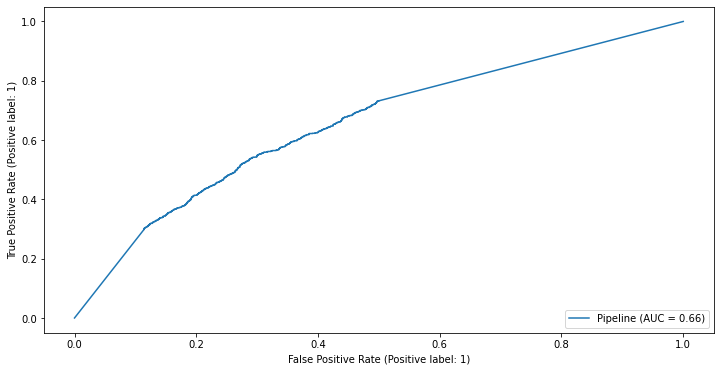

In [ ]:
dt_displ_smoteunder = RocCurveDisplay.from_estimator(dt_smoteunder, X0_test, Y0_test)

##### SMOTE & Tomek links

In [216]:
steps = [('o', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))), ('dt', DecisionTreeClassifier(class_weight='balanced'))]
dt_smotetomek = Pipeline(steps=steps)

In [217]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dt_smote_tomek = cross_validate(dt_smotetomek, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

KeyboardInterrupt: 

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(dt_smote_tomek['test_accuracy']), std(dt_smote_tomek['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(dt_smote_tomek['test_recall']), std(dt_smote_tomek['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(dt_smote_tomek['test_f1']), std(dt_smote_tomek['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(dt_smote_tomek['test_roc_auc']), std(dt_smote_tomek['test_roc_auc'])))

Accuracy: 0.681 (0.009)
ROC-curve: 0.671 (0.011)
Recall: 0.557 (0.017)


###### Prediction

In [ ]:
dt_smotetomek.fit(X0_train, Y0_train)
pred_dt_smote_tomek = dt_smotetomek.predict(X0_test)

###### Confusion

In [ ]:
print(confusion_matrix(Y0_test, pred_dt_smote_tomek))

[[3220 1375]
 [ 611  696]]


###### ROC curve

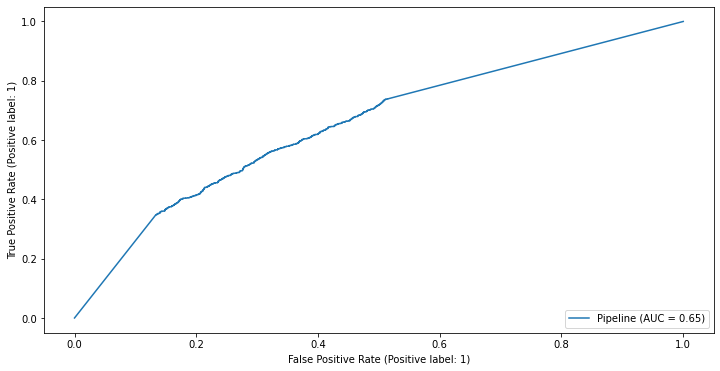

In [ ]:
mlp_displ_smotetomek = RocCurveDisplay.from_estimator(mlp_smotetomek, X0_test, Y0_test)

##### Smote & Edited Nearest Neighbors (ENN) Undersampling

In [ ]:
steps = [('o', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))), ('dt', DecisionTreeClassifier(class_weight='balanced'))]
dt_smoteenn = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dt_smote_enn = cross_validate(dt_smoteenn, X0_train, Y0_train, scoring=('accuracy','roc_auc', 'recall'), cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(dt_smote_enn['test_accuracy']), std(dt_smote_enn['test_accuracy'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(dt_smote_enn['test_roc_auc']), std(dt_smote_enn['test_roc_auc'])))
print('Recall: %.3f (%.3f)' % (np.mean(dt_smote_enn['test_recall']), std(dt_smote_enn['test_recall'])))

Accuracy: 0.567 (0.007)
ROC-curve: 0.663 (0.011)
Recall: 0.744 (0.019)


###### Prediction

In [ ]:
dt_smoteenn.fit(X0_train, Y0_train)
pred_dt_smote_enn = dt_smoteenn.predict(X0_test)

###### Confusion matrix

In [ ]:
print(confusion_matrix(Y0_test, pred_dt_smote_enn))

[[2341 2254]
 [ 352  955]]


###### ROC curve

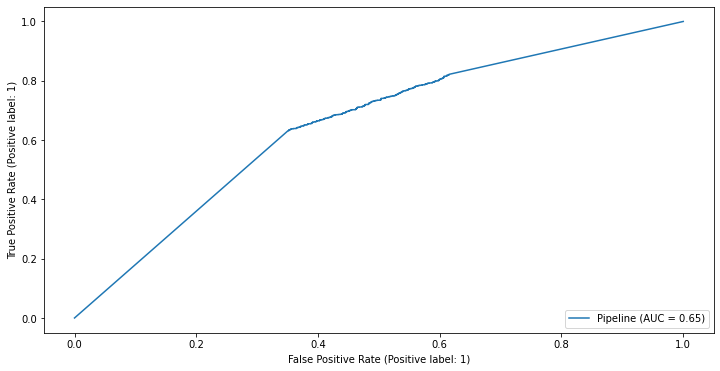

In [ ]:
dt_displ_smoteenn = RocCurveDisplay.from_estimator(dt_smoteenn, X0_test, Y0_test)

#### Random Forest

##### Random over-sampling & Random over-sampling

In [111]:
steps = [('o', RandomOverSampler()), ('u', RandomUnderSampler()), ('rf', RandomForestClassifier(class_weight='balanced'))]
rf_overunder = Pipeline(steps=steps)

In [112]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
rf_over_under = cross_validate(rf_overunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc', ), cv=cv, n_jobs=-1)

In [113]:
print('Accuracy: %.3f (%.3f)' % (np.mean(rf_over_under['test_accuracy']), std(rf_over_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(rf_over_under['test_recall']), std(rf_over_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(rf_over_under['test_f1']), std(rf_over_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(rf_over_under['test_roc_auc']), std(rf_over_under['test_roc_auc'])))

Accuracy: 0.809 (0.006)
Recall: 0.444 (0.018)
f1-score: 0.509 (0.015)
ROC-curve: 0.769 (0.012)


###### Prediction

In [114]:
rf_overunder.fit(X0_train, Y0_train)
pred_rf_over_under = rf_overunder.predict(X0_test)

###### Confusion matrix

In [115]:
print(confusion_matrix(Y0_test, pred_rf_over_under))

[[4165  401]
 [ 747  595]]


###### ROC curve

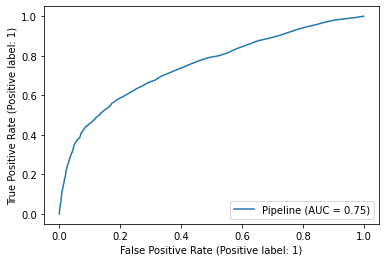

In [116]:
rf_displ_overunder = RocCurveDisplay.from_estimator(rf_overunder, X0_test, Y0_test)

##### SMOTE & Random under-sampling

In [ ]:
steps = [('o', SMOTE()), ('u', RandomUnderSampler()), ('rf', RandomForestClassifier(class_weight='balanced'))]
rf_smoteunder = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
rf_smote_under = cross_validate(rf_smoteunder, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(rf_smote_under['test_accuracy']), std(rf_smote_under['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(rf_smote_under['test_recall']), std(rf_smote_under['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(rf_smote_under['test_f1']), std(rf_smote_under['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(rf_smote_under['test_roc_auc']), std(rf_smote_under['test_roc_auc'])))

Accuracy: 0.692 (0.009)
ROC-curve: 0.670 (0.011)
Recall: 0.529 (0.020)


###### Prediction

In [ ]:
rf_smoteunder.fit(X0_train, Y0_train)
pred_rf_smote_under = rf_smoteunder.predict(X0_test)

###### Confusion matrix

In [ ]:
print(confusion_matrix(Y0_test, pred_rf_smote_under))

[[3364 1231]
 [ 650  657]]


###### ROC curve

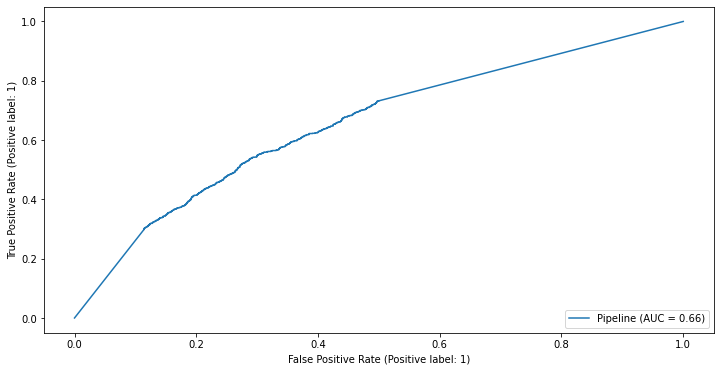

In [ ]:
rf_displ_smoteunder = RocCurveDisplay.from_estimator(rf_smoteunder, X0_test, Y0_test)

##### SMOTE & Tomek links

In [ ]:
steps = [('o', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))), ('rf', RandomForestClassifier(class_weight='balanced'))]
rf_smotetomek = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
rf_smote_tomek = cross_validate(rf_smotetomek, X0_train, Y0_train, scoring=('accuracy', 'recall', 'f1', 'roc_auc'), cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(rf_smote_tomek['test_accuracy']), std(rf_smote_tomek['test_accuracy'])))
print('Recall: %.3f (%.3f)' % (np.mean(rf_smote_tomek['test_recall']), std(rf_smote_tomek['test_recall'])))
print('f1-score: %.3f (%.3f)' % (np.mean(rf_smote_tomek['test_f1']), std(rf_smote_tomek['test_f1'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(rf_smote_tomek['test_roc_auc']), std(rf_smote_tomek['test_roc_auc'])))

Accuracy: 0.681 (0.009)
ROC-curve: 0.671 (0.011)
Recall: 0.557 (0.017)


###### Prediction

In [ ]:
rf_smotetomek.fit(X0_train, Y0_train)
pred_rf_smote_tomek = rf_smotetomek.predict(X0_test)

###### Confusion

In [ ]:
print(confusion_matrix(Y0_test, pred_rf_smote_tomek))

[[3220 1375]
 [ 611  696]]


###### ROC curve

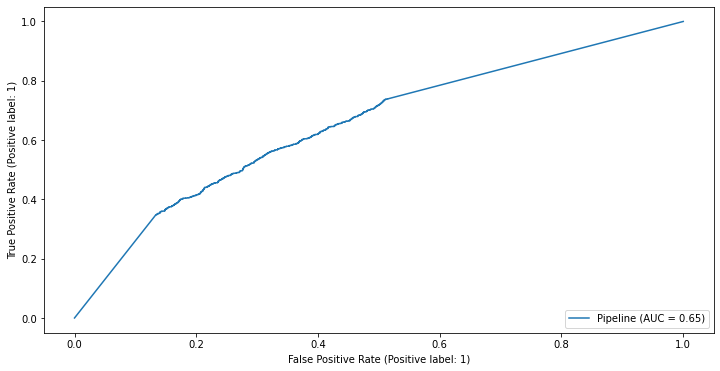

In [ ]:
rf_displ_smotetomek = RocCurveDisplay.from_estimator(rf_smotetomek, X0_test, Y0_test)

##### Smote & Edited Nearest Neighbors (ENN) Undersampling

In [ ]:
steps = [('o', SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))), ('rf', RandomForestClassifier(class_weight='balanced'))]
rf_smoteenn = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
rf_smote_enn = cross_validate(rf_smoteenn, X0_train, Y0_train, scoring=('accuracy','roc_auc', 'recall'), cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (np.mean(rf_smote_enn['test_accuracy']), std(rf_smote_enn['test_accuracy'])))
print('ROC-curve: %.3f (%.3f)' % (np.mean(rf_smote_enn['test_roc_auc']), std(rf_smote_enn['test_roc_auc'])))
print('Recall: %.3f (%.3f)' % (np.mean(rf_smote_enn['test_recall']), std(rf_smote_enn['test_recall'])))

Accuracy: 0.567 (0.007)
ROC-curve: 0.663 (0.011)
Recall: 0.744 (0.019)


###### Prediction

In [ ]:
rf_smoteenn.fit(X0_train, Y0_train)
pred_rf_smote_enn = rf_smoteenn.predict(X0_test)

###### Confusion matrix

In [ ]:
print(confusion_matrix(Y0_test, pred_rf_smote_enn))

[[2341 2254]
 [ 352  955]]


###### ROC curve

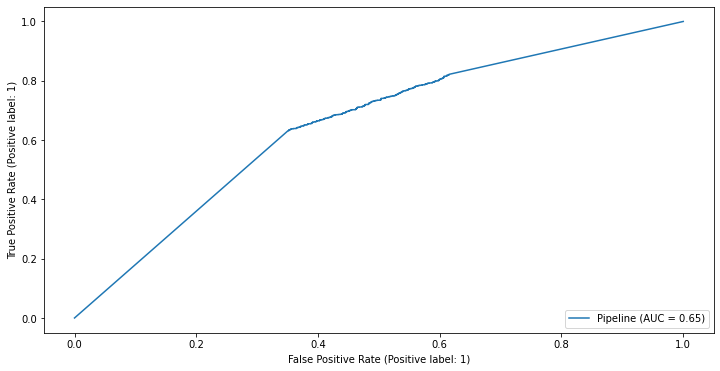

In [ ]:
rf_displ_smoteenn = RocCurveDisplay.from_estimator(rf_smoteenn, X0_test, Y0_test)

#### Graphical analysis

[Text(1, 0, 'kNN'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'MLP'),
 Text(4, 0, 'DT'),
 Text(5, 0, 'RF')]

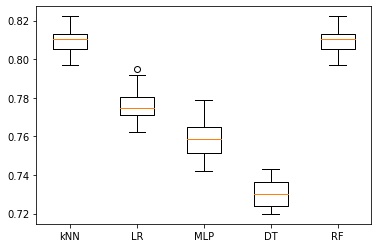

In [204]:
acc_overunder_dict = {'kNN':rf_over_under['test_accuracy'], 'LR':lr_over_under['test_accuracy'], 'MLP':mlp_over_under['test_accuracy'], 'DT':dt_over_under['test_accuracy'], 'RF':rf_over_under['test_accuracy']}
fig, ax = plt.subplots()
ax.boxplot(acc_overunder_dict.values())
ax.set_xticklabels(acc_overunder_dict.keys())

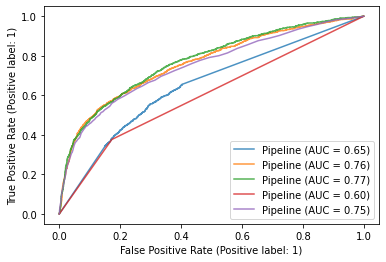

In [223]:
ax = plt.gca()
knn_displ_overunder.plot(ax=ax, alpha=0.8)
lr_displ_overunder.plot(ax=ax, alpha=0.8)
mlp_displ_overunder.plot(ax=ax, alpha=0.8)
dt_displ_overunder.plot(ax=ax, alpha=0.8)
rf_displ_overunder.plot(ax=ax, alpha=0.8)
plt.show()